* Introduction 
    *    Import & Tidy 
    * .  Issues with the Data 
*  Analysis 
    *     By Sex 
    *     By Age 
    *     By Generation 
    *     By GDP 
*  Merging HDI database 
    *     By Country 
    *     Sex and Social Economic Factors
    *     Age and Social Economic Factors 
*  Conculsion

**Import & Tidy **

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['suicide-rates-overview-1985-to-2016', 'human-development-index-hdi']


As you can see not all countries have the same amount of data. 

In [2]:
data = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
data.shape

(27820, 12)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


We will take off the HDI because there is only 8364 out of 27820 data points. 

In [4]:
dataEdit = data.drop(columns = "HDI for year")
dataEdit.rename(columns={"country":"Country",'suicides/100k pop':'suicid_ratio_100K','gdp_for_year ($)':'gdp_for_Year','gdp_per_capita ($)':'gdp_per_capita'},inplace=True)
dataEdit.loc[dataEdit["generation"]=="Generation Z"]
dataEdit.head()

Country  year       ...        gdp_per_capita       generation
0  Albania  1987       ...                   796     Generation X
1  Albania  1987       ...                   796           Silent
2  Albania  1987       ...                   796     Generation X
3  Albania  1987       ...                   796  G.I. Generation
4  Albania  1987       ...                   796          Boomers

[5 rows x 11 columns]

In [5]:
countryData = dataEdit.Country.value_counts().rename_axis("Country").reset_index(name='Number Of Data')
countryData.head()

Country  Number Of Data
0            Iceland             382
1            Austria             382
2        Netherlands             382
3          Mauritius             382
4  Republic of Korea             372

In [6]:
countryData.describe()


Number Of Data
count      101.000000
mean       275.445545
std        107.598557
min         10.000000
25%        252.000000
50%        312.000000
75%        360.000000
max        382.000000

For example, Macau only has the year 1994 of all age groups for males and females

In [7]:
dataEdit.loc[dataEdit["Country"]=="Macau"]

Country  year       ...        gdp_per_capita       generation
15678   Macau  1994       ...                 18081  G.I. Generation
15679   Macau  1994       ...                 18081  G.I. Generation
15680   Macau  1994       ...                 18081           Silent
15681   Macau  1994       ...                 18081           Silent
15682   Macau  1994       ...                 18081          Boomers
15683   Macau  1994       ...                 18081          Boomers
15684   Macau  1994       ...                 18081     Generation X
15685   Macau  1994       ...                 18081          Boomers
15686   Macau  1994       ...                 18081          Boomers
15687   Macau  1994       ...                 18081     Generation X
15688   Macau  1994       ...                 18081       Millenials
15689   Macau  1994       ...                 18081       Millenials

[12 rows x 11 columns]

In [8]:
dataEdit.loc[dataEdit["Country"]=="Austria"].head()


Country  year       ...        gdp_per_capita       generation
1786  Austria  1985       ...                  9759  G.I. Generation
1787  Austria  1985       ...                  9759  G.I. Generation
1788  Austria  1985       ...                  9759           Silent
1789  Austria  1985       ...                  9759          Boomers
1790  Austria  1985       ...                  9759  G.I. Generation

[5 rows x 11 columns]

**Issues with the Data **

So we cannot simply look at the total number of suicides by year because countries such as Macau only has data for 1994. Also we cannot compare each country. So in order to perform an analysis, we need countries that have data for each year for male and female with thier age group. Thus, each year, a country should have 12 data points. 6 age groups for males and 6 age groups for females. Since the data is from 1985 to 2016, there should be 384 data points (32*12) for each country. The problem is that not even the countries with the most data points do not have 384. Austria has only 382 data points since it doesn't have all 12 data points for 2016.


In [9]:
countryYear = dataEdit.groupby(["Country","year"])
countryYearCount = countryYear.size().reset_index(name='Count')
countryYearCount = countryYearCount.loc[countryYearCount["Count"]==12]
countryYearCount.head()

Country  year  Count
0  Albania  1987     12
1  Albania  1988     12
2  Albania  1989     12
3  Albania  1992     12
4  Albania  1993     12

In [10]:
countryYearCount.loc[countryYearCount["year"]==2016]

Empty DataFrame
Columns: [Country, year, Count]
Index: []

These are countries and year combinations that have 12 data points. (6 age groups for male and female). There are now only 99 countries and the year 2016 is not included. 

In [11]:
countryYearCountValue = countryYearCount.Country.value_counts().rename_axis('Country').reset_index(name='NumberOfYears')
FreqCountryCount = countryYearCountValue.NumberOfYears.value_counts().rename_axis('Number Of Years').reset_index(name='Count').sort_values(by=['Number Of Years'],ascending=False)
FreqCountryCount.head()

Number Of Years  Count
0               31     23
4               30      7
5               29      5
6               28      5
2               27      7

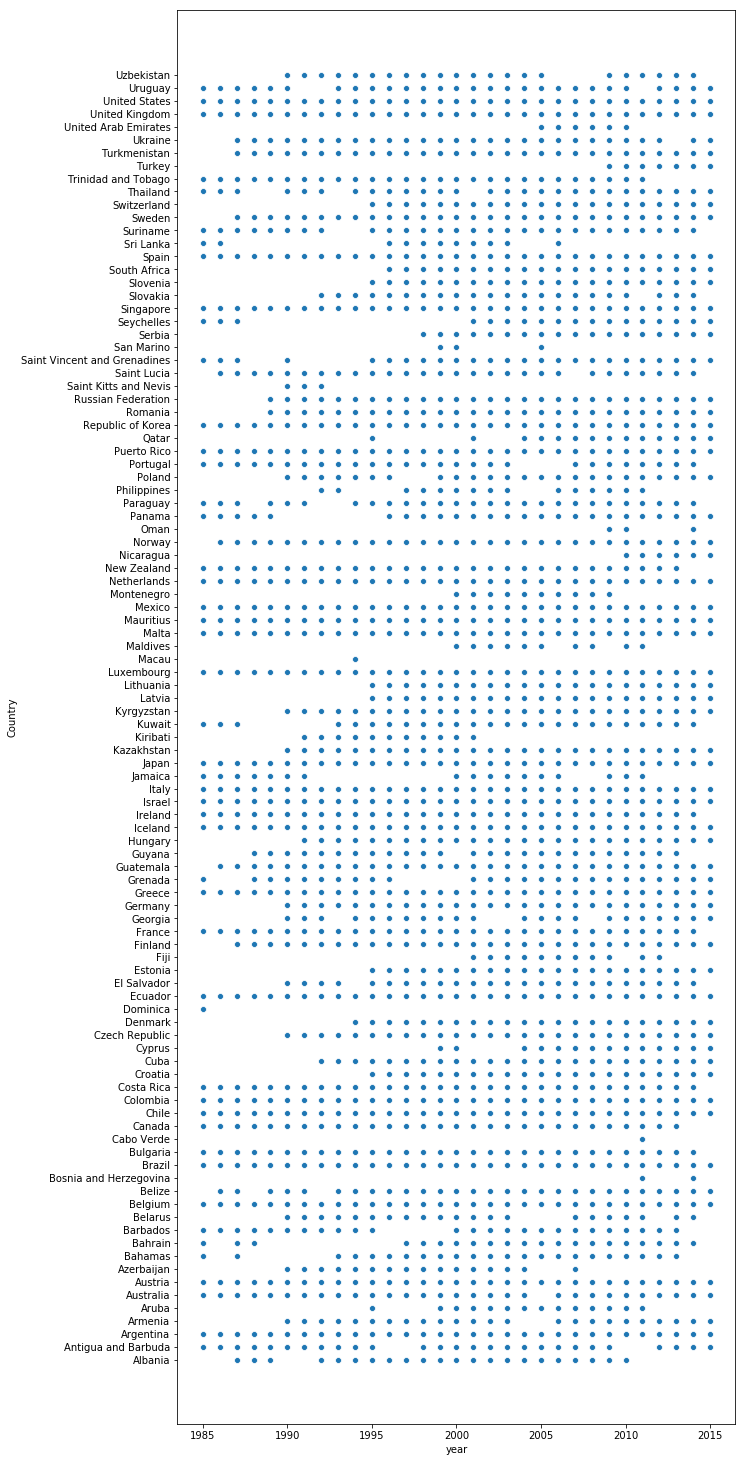

In [12]:

fig, ax = plt.subplots(figsize=(10,26))
bar = sns.scatterplot(x="year", y="Country", data=countryYearCount)



There are only 23 countries that have data from 1985 to 2015 (31 years). Thus a comparsion of countries or even year to year analysis should only be done with the 23 countries which is 23*31*12 = 8556 data points. This is only 8556/27820 which is about 30% of the data provided. Also, countries like Beralus have gaps within the their year range. 
     


In [13]:
countries31 = countryYearCountValue.loc[countryYearCountValue["NumberOfYears"]==31]
countries31.head()

Country  NumberOfYears
0      Belgium             31
1      Ecuador             31
2     Colombia             31
3        Chile             31
4  Netherlands             31

**Analysis**

**Sex**

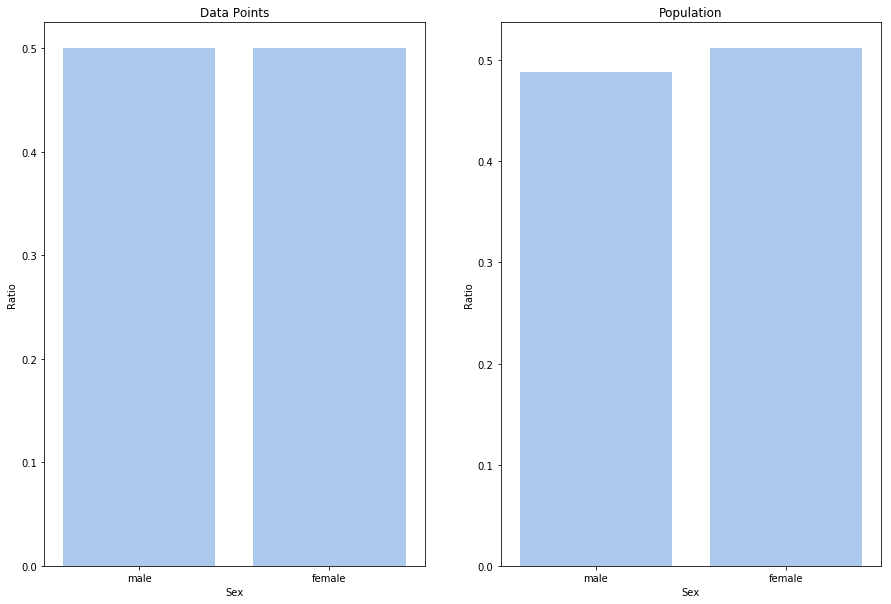

In [14]:
def OverallRatio(factor,order):
    result={}
    ratioDataPoints={}
    ratioPopulation = {}
    totalDataPoints = dataEdit.size
    totalPopulation = dataEdit["population"].sum()
    for i in order:
        ratioDataPoints[i] = dataEdit.loc[dataEdit[factor]==i].size/totalDataPoints
        ratioPopulation[i] = dataEdit.loc[dataEdit[factor]==i]["population"].sum()/totalPopulation
    result["ratioDataPoints"]=ratioDataPoints
    result["ratioPopulation"]=ratioPopulation
    return result

def toDataFrame(data,index,columnName):    
    dataFrame = pd.Series(data, name= columnName)
    dataFrame.index.names=[index]
    dataFrame=dataFrame.reset_index(name=columnName)
    return dataFrame

ratioDataPoints = toDataFrame(data=OverallRatio(factor="sex",order=["male","female"])["ratioDataPoints"],index="Sex",columnName="Ratio")
ratioPopulation = toDataFrame(data=OverallRatio(factor="sex",order=["male","female"])["ratioPopulation"],index="Sex",columnName="Ratio")
ratioDataPoints,ratioPopulation
f, ax = plt.subplots(figsize=(15, 10),ncols=2)
sns.set_color_codes("pastel")
plot = sns.barplot(x="Sex", y="Ratio", data=ratioDataPoints,label="Total", color="b" ,ci=None, order=["male","female"],ax=ax[0]).set_title("Data Points")
plot = sns.barplot(x="Sex", y="Ratio", data=ratioPopulation,label="Total", color="b" ,ci=None, order=["male","female"],ax=ax[1]).set_title("Population")

There is equal amount of male and female Data while males are slighly less in terms of the population. It should be noted that we have summed up the population of a given the year, sex, age and group. However, since its a ratio, it has no effect.

In [15]:
def averageSuicideRatio(factor,order):
    ratio={}
    for i in order:
        ratio[i] = dataEdit.loc[dataEdit[factor]==i]["suicid_ratio_100K"].mean()
    return ratio

average_Suicide_Ratio = toDataFrame(data=averageSuicideRatio(factor="sex",order=["male","female"]),index="Sex",columnName="Average Suicide Ratio per 100k")
average_Suicide_Ratio



Sex  Average Suicide Ratio per 100k
0    male                       20.239329
1  female                        5.392866

Even though there rougly the same males and females, the average suicid ratio for Males is almost 4 times as much. 

In [16]:
def TotalSuicides(groupby,seperate,suicides_no):
    result = []
    groupbyLength = len(groupby)
    if seperate == True:
        for i in FreqCountryCount["Number Of Years"]:
            countries = countryYearCountValue.loc[countryYearCountValue["NumberOfYears"]==i]
            CountryAnalysis=pd.DataFrame() 
            for country in countries["Country"]:
                countrydf = dataEdit.loc[dataEdit["Country"]==country]
                CountryAnalysis = CountryAnalysis.append(countrydf,ignore_index=True)

            #drop year of 2016
            CountryAnalysis = CountryAnalysis.drop(CountryAnalysis[CountryAnalysis.year==2016].index)
            #Analysis based on groupby
            if suicides_no==True:
                CountryAnalysisTotalSuicides = CountryAnalysis.groupby(groupby).agg({"suicides_no":"sum"})
                CountryAnalysisTotalSuicides.reset_index(level=list(range(groupbyLength)), inplace=True)
                result.append([CountryAnalysisTotalSuicides,i])
            else:
                CountryAnalysisTotalSuicides = CountryAnalysis.groupby(groupby).agg({"suicid_ratio_100K":"mean"})
                CountryAnalysisTotalSuicides.reset_index(level=list(range(groupbyLength)), inplace=True)
                result.append([CountryAnalysisTotalSuicides,i])
        return result
    else:
        if suicides_no==True:
            CountryAnalysisTotalSuicides = dataEdit.groupby(groupby).agg({"suicides_no":"sum","gdp_per_capita":"mean","population":"sum"})
            CountryAnalysisTotalSuicides.reset_index(level=list(range(groupbyLength)), inplace=True)
            return CountryAnalysisTotalSuicides
        else:
            CountryAnalysisTotalSuicides = dataEdit.groupby(groupby).agg({"suicid_ratio_100K":"mean","gdp_per_capita":"mean"})
            CountryAnalysisTotalSuicides.reset_index(level=list(range(groupbyLength)), inplace=True)
            return CountryAnalysisTotalSuicides




In [17]:
def TotalSuicidesSex(all_or_numbers):
    if all_or_numbers == True:
        for i in TotalSuicides(["Country","sex"],seperate = True,suicides_no=True):
            sns.set(style="whitegrid")
            plot = sns.catplot(x="Country", y="suicides_no", data=i[0] ,hue="sex", kind="bar", palette="muted",height=15, aspect=2, ci=None)
            plt.title("Total Suicides From 1985 to 2015 -- {} Years worth of Data ".format(i[1]))
            plot.set_axis_labels("", "Number of Suicidies")
        return plot
    else:
        for i in TotalSuicides(["Country","sex"],seperate = True,suicides_no=True):
            if i[1] in all_or_numbers:
                sns.set(style="whitegrid")
                plot = sns.catplot(x="Country", y="suicides_no", data=i[0] ,hue="sex", kind="bar", palette="muted",height=15, aspect=2, ci=None)
                plt.title("Total Suicides From 1985 to 2015 -- {} Years worth of Data ".format(i[1]))
                plot.set_axis_labels("", "Number of Suicidies")
        return plot    



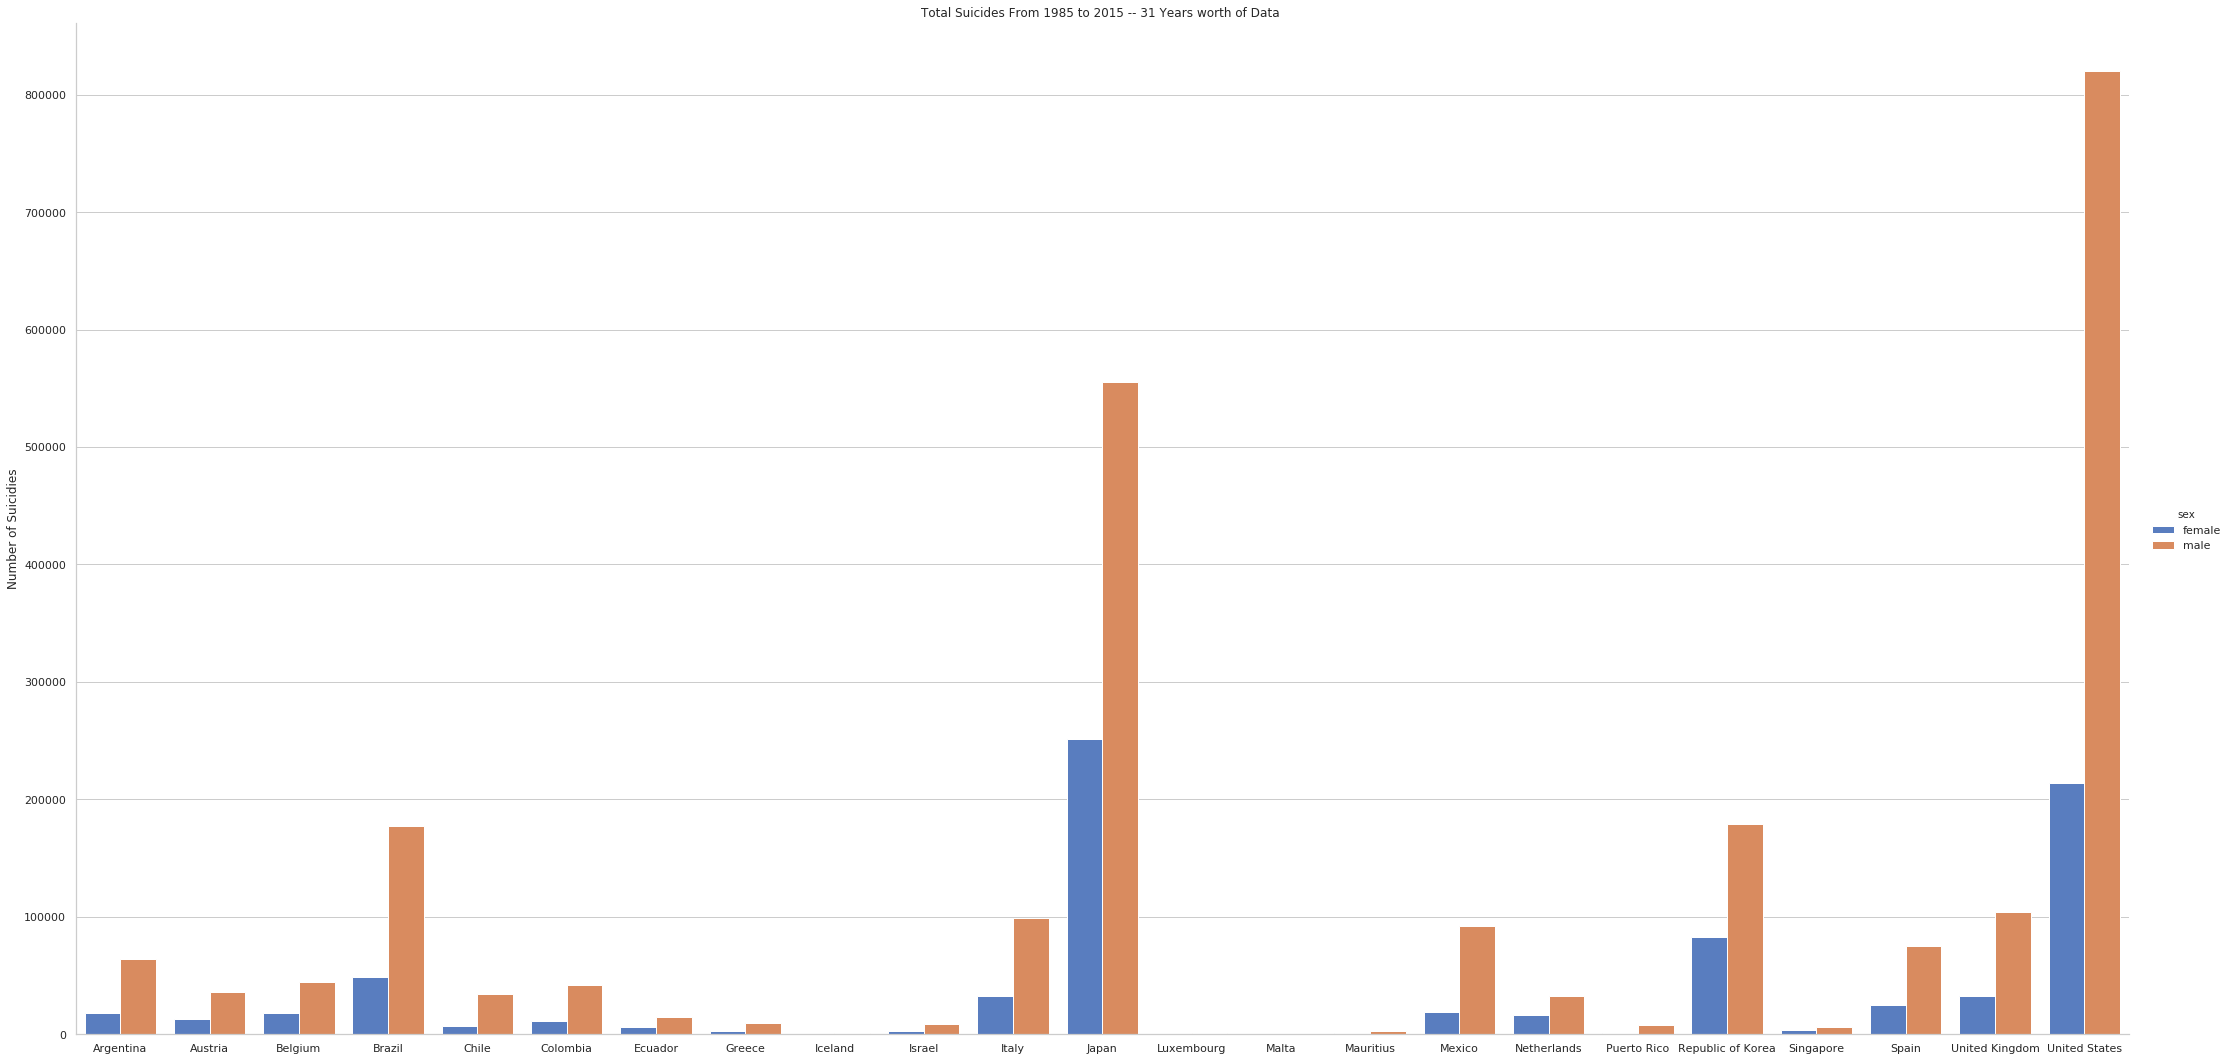

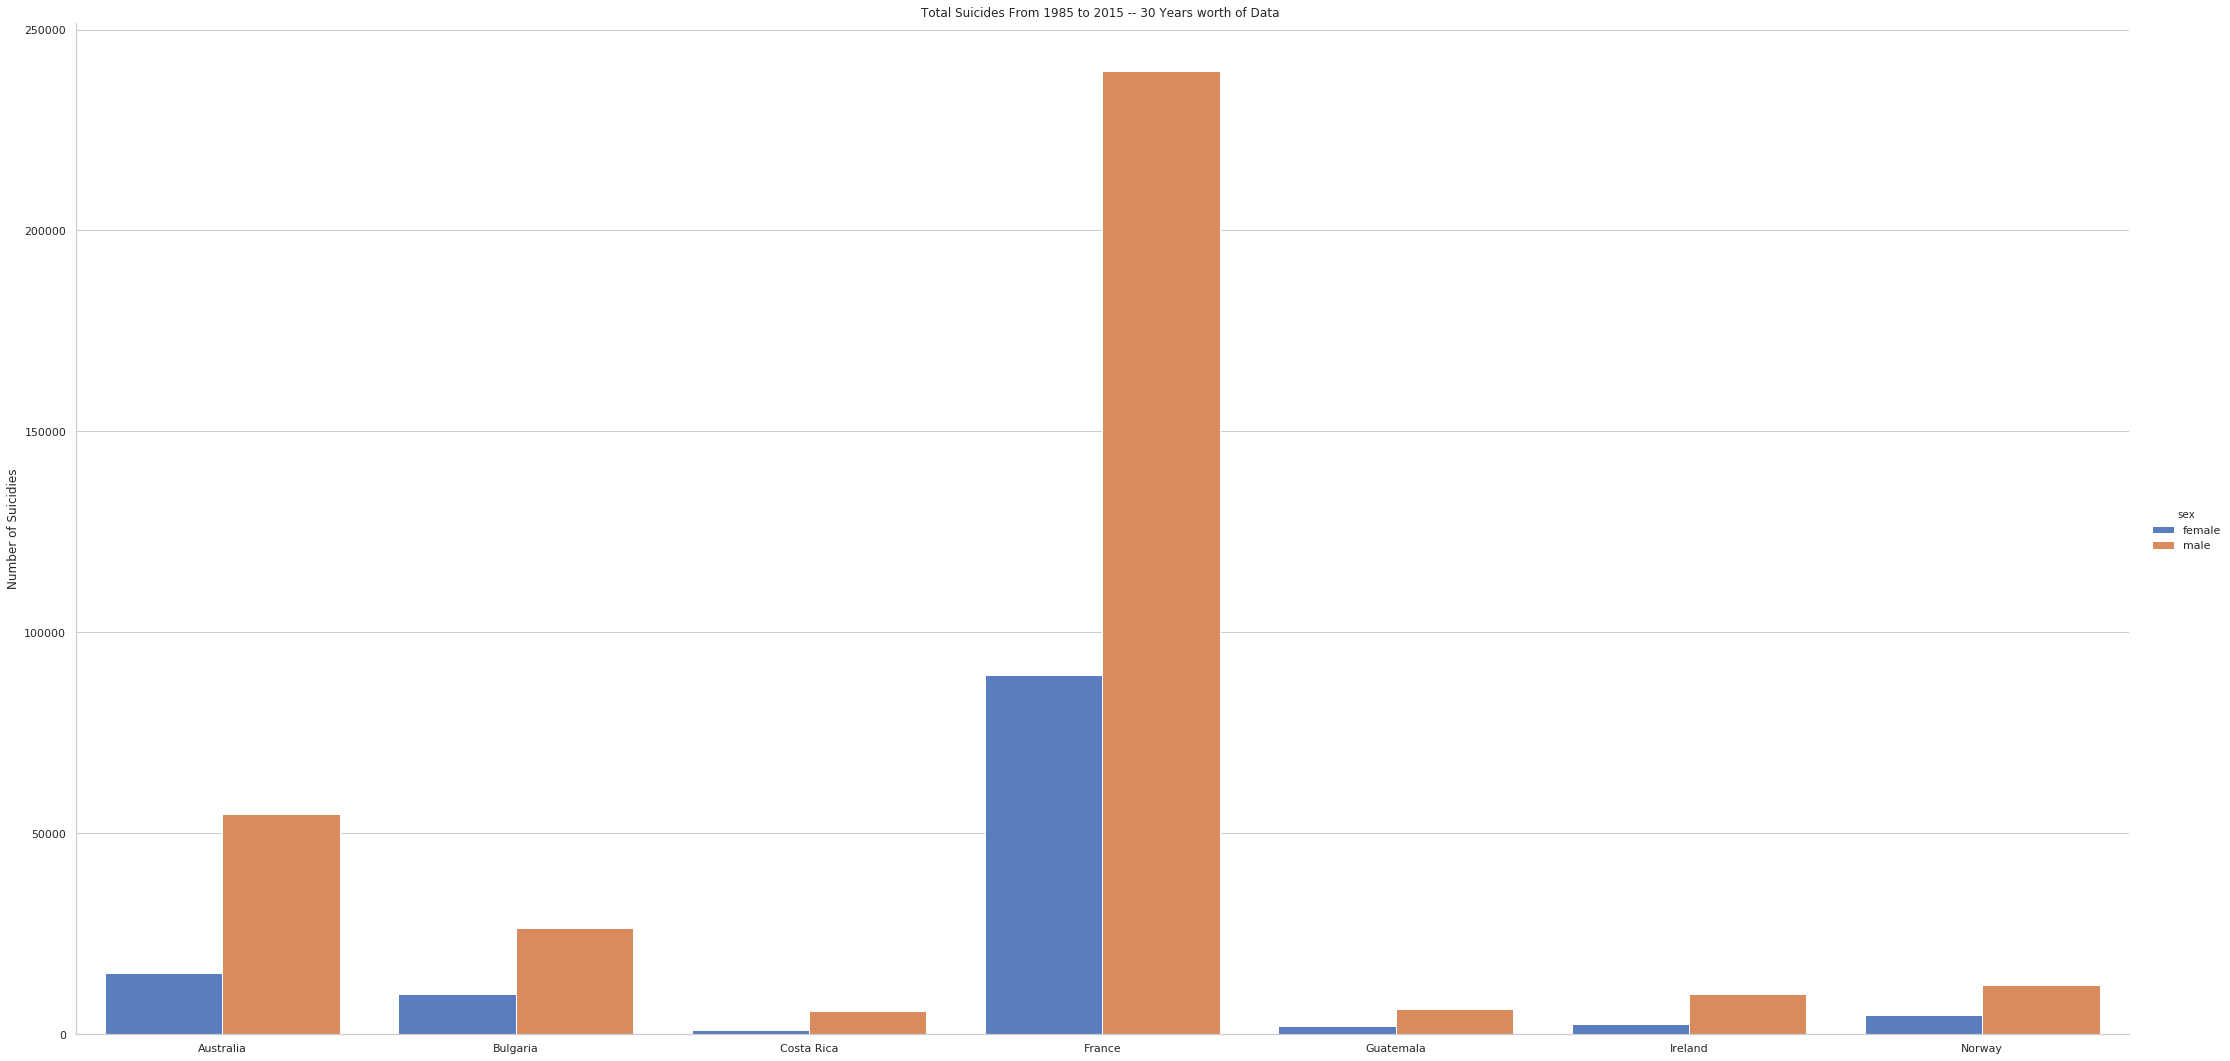

In [18]:
TotalSuicidesSex(all_or_numbers=[31,30])

Based on the data from 100 countires seperated into the number of years of data provided, men have commited suicide more than women. However, above are only countries that have 30 and 31 years of data. 

In [19]:
def Ratio(data,factors,name,numerator,denominator,suicides_no):
    Ratio = data
    if suicides_no==True:
        c = Ratio.groupby(factors)["suicides_no"].sum().reset_index(name = denominator)
    else:
        c = Ratio.groupby(factors)["suicid_ratio_100K"].mean().reset_index(name = denominator)
    Ratio = pd.merge(Ratio, c, on=factors, how='outer')
    Ratio[name] = Ratio[numerator]/Ratio[denominator]
    Ratio[name] = Ratio[name].replace('nan', np.nan).fillna(0)
    return Ratio



Country     sex  suicides_no  ...    population  Total  Ratio
54                Dominica  female            0  ...         33000      0    0.0
55                Dominica    male            0  ...         33400      0    0.0
152  Saint Kitts and Nevis  female            0  ...         61200      0    0.0
153  Saint Kitts and Nevis    male            0  ...         56100      0    0.0

[4 rows x 7 columns]

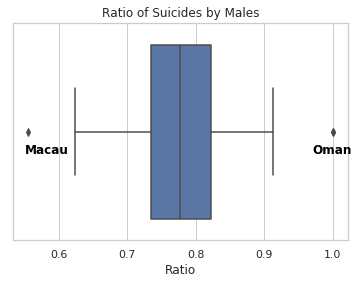

In [20]:
MenVsWomen = Ratio(TotalSuicides(["Country","sex"],seperate=False,suicides_no=True),factors='Country',name="Ratio",numerator="suicides_no",denominator="Total" ,suicides_no=True)
MenVsWomenNoSuicide =  MenVsWomen.loc[MenVsWomen["Total"]==0]
MenVsWomen = MenVsWomen.loc[MenVsWomen["Total"]>0]
onlyMales = MenVsWomen.loc[MenVsWomen["sex"]=="male"]
boxplot = sns.boxplot(x=onlyMales["Ratio"])
maximum = onlyMales.loc[onlyMales['Ratio'].idxmax()]["Country"]
minimum = onlyMales.loc[onlyMales['Ratio'].idxmin()]["Country"]
boxplot.text(0.97, 0.1, maximum, horizontalalignment='left', size='medium', color='black', weight='semibold')
boxplot.text(0.55, 0.1, minimum, horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title("Ratio of Suicides by Males")
description = onlyMales.describe()
description=description["Ratio"].reset_index(name='Ratio')
description.rename(columns={'index':'Description'},inplace=True)
description
MenVsWomenNoSuicide

In all the countries, men have committed more suicides. 78% of suicides on average are men. It should be noted that we used all the data available because we are looking at the ratio between men and women.  The outliers Macau and Oman both have little data. Domica and Saint Kitts and Nevis were removed because they recorded no suicides and as a result, the ratio will be undefined. 

**Age Groups**

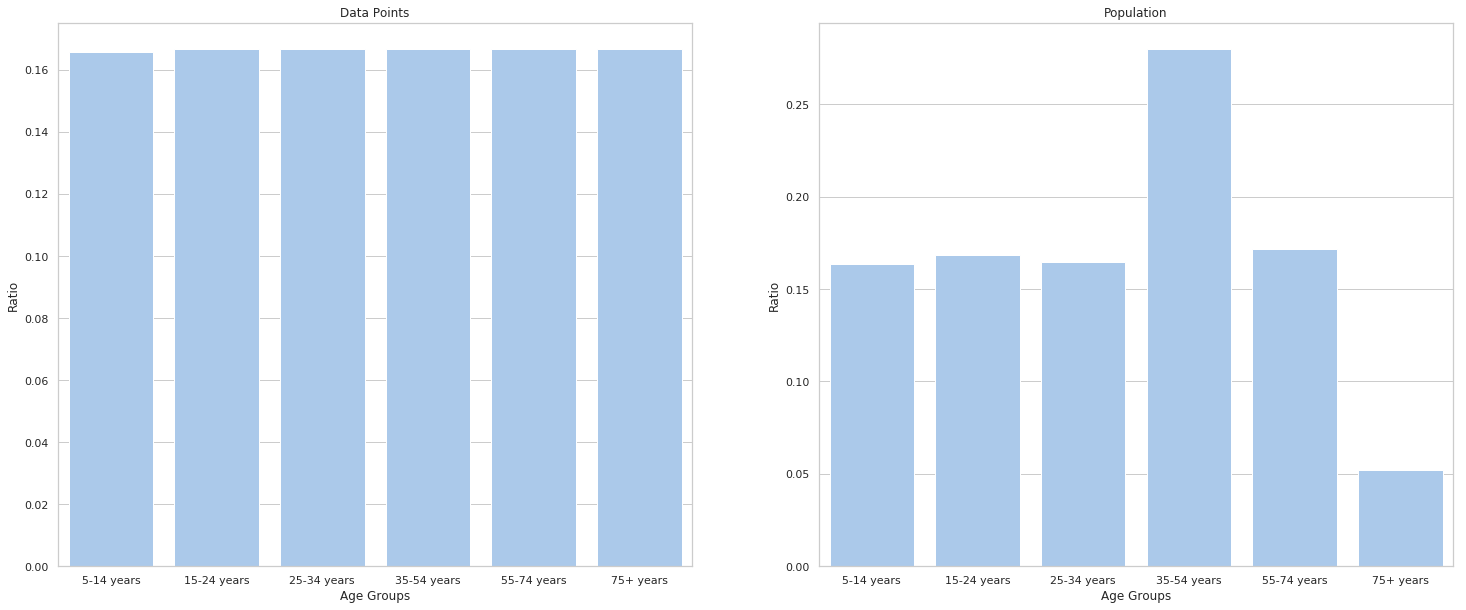

In [21]:
age_order=["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]
ratioDataPoints = toDataFrame(data=OverallRatio(factor="age",order=age_order)["ratioDataPoints"],index="Age Groups",columnName="Ratio")
ratioPopulation = toDataFrame(data=OverallRatio(factor="age",order=age_order)["ratioPopulation"],index="Age Groups",columnName="Ratio")
ratioDataPoints,ratioPopulation
f, ax = plt.subplots(figsize=(25, 10),ncols=2)
sns.set_color_codes("pastel")
plot = sns.barplot(x="Age Groups", y="Ratio", data=ratioDataPoints,label="Total", color="b" ,ci=None, order=age_order,ax=ax[0]).set_title("Data Points")
plot = sns.barplot(x="Age Groups", y="Ratio", data=ratioPopulation,label="Total", color="b" ,ci=None, order=age_order,ax=ax[1]).set_title("Population")

There is an evenly distrubuted amount of data points for all the age groups. However, there is a higher population in the age group 35-54 years old.

In [22]:
age_order=["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]
def averageSuicideRatio(factor,order):
    ratio={}
    for i in order:
        ratio[i] = dataEdit.loc[dataEdit[factor]==i]["suicid_ratio_100K"].mean()
    return ratio

average_Suicide_Ratio = toDataFrame(data=averageSuicideRatio(factor="age",order=age_order),index="Age",columnName="Average Suicide Ratio per 100k")
average_Suicide_Ratio
#groupSexRatio(groupName = "age",order=age_order,suicides_no=True)

Age  Average Suicide Ratio per 100k
0   5-14 years                        0.620041
1  15-24 years                        8.947154
2  25-34 years                       12.186885
3  35-54 years                       14.947441
4  55-74 years                       16.155579
5    75+ years                       23.955409

The high amount of people in the age group 35-54 years could explain why there is such a high number of suicides. We can look at the suicide ratio 100k to verify the explaination. The suicide ratio 100k is the number of suicides given the population of the country,year, age and sex. When grouping the data, an average of the ratio was calculated. 

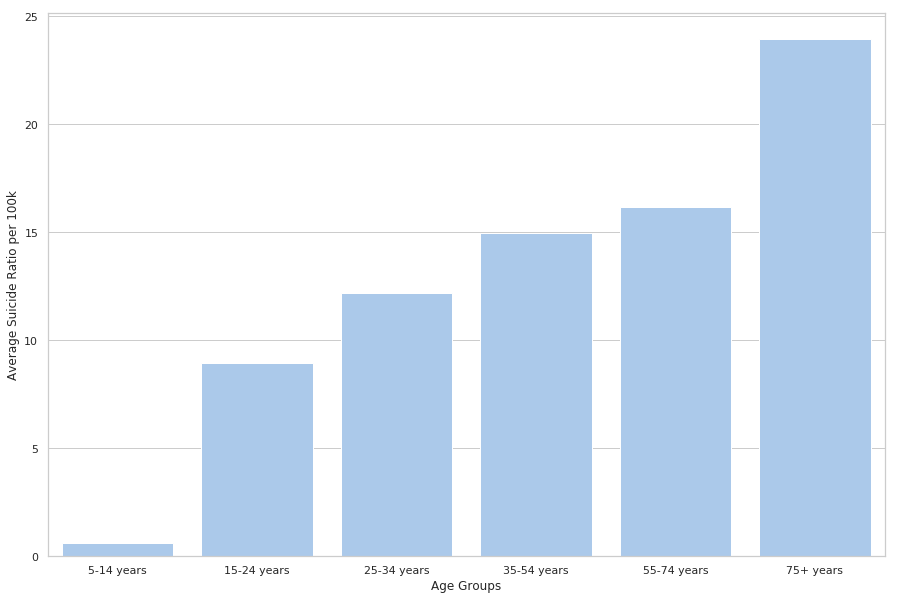

In [23]:
average_Suicide_Ratio = toDataFrame(data=averageSuicideRatio(factor="age",order=age_order),index="Age Groups",columnName="Average Suicide Ratio per 100k")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.barplot(x="Age Groups", y="Average Suicide Ratio per 100k", data=average_Suicide_Ratio,
                color="b",ci=None, order=age_order)

As a result, an average of over 20 per 100 k people commited sucicde  in the age group 75+. Thus it is more likely that people above the age of 75 will commit suicide.

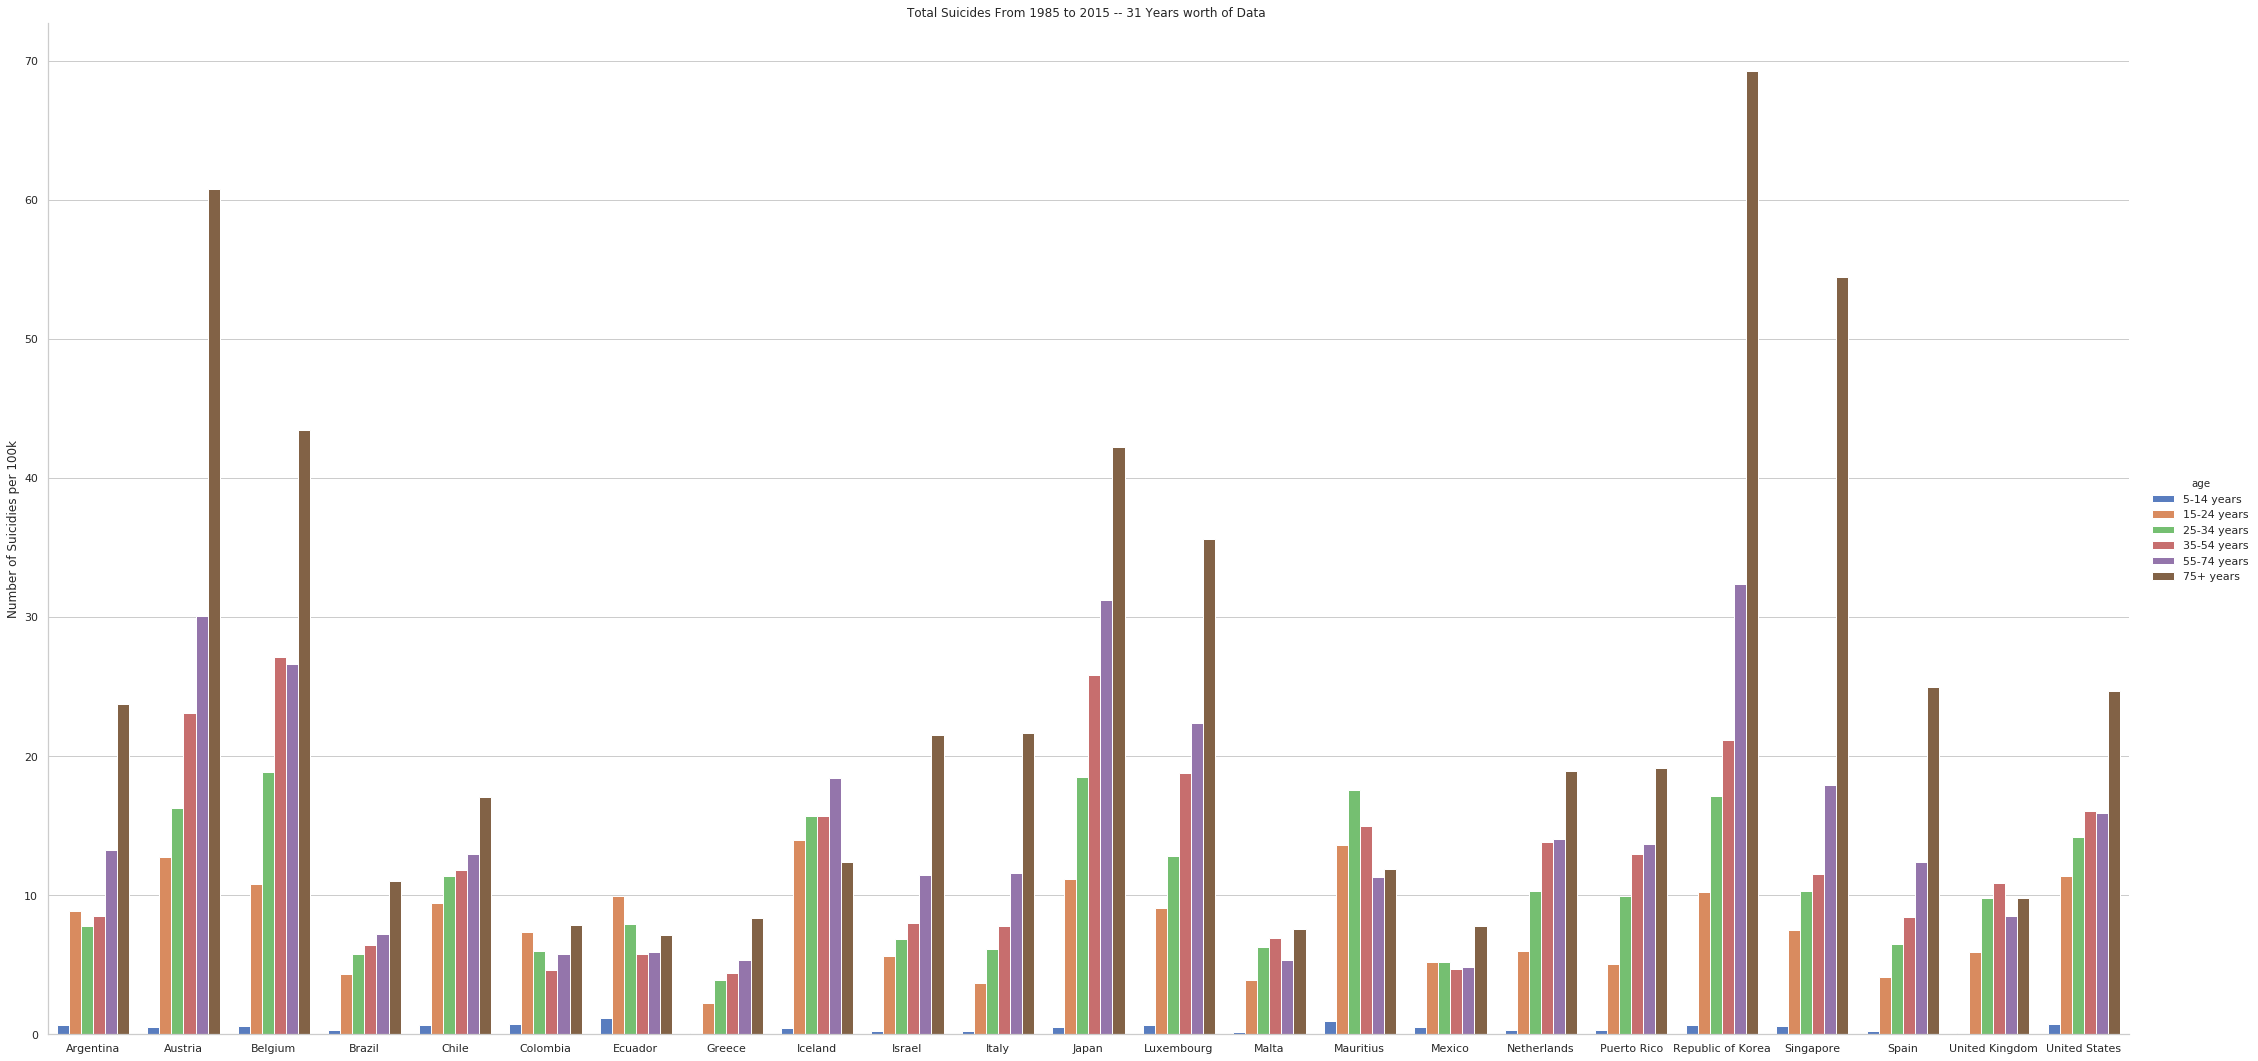

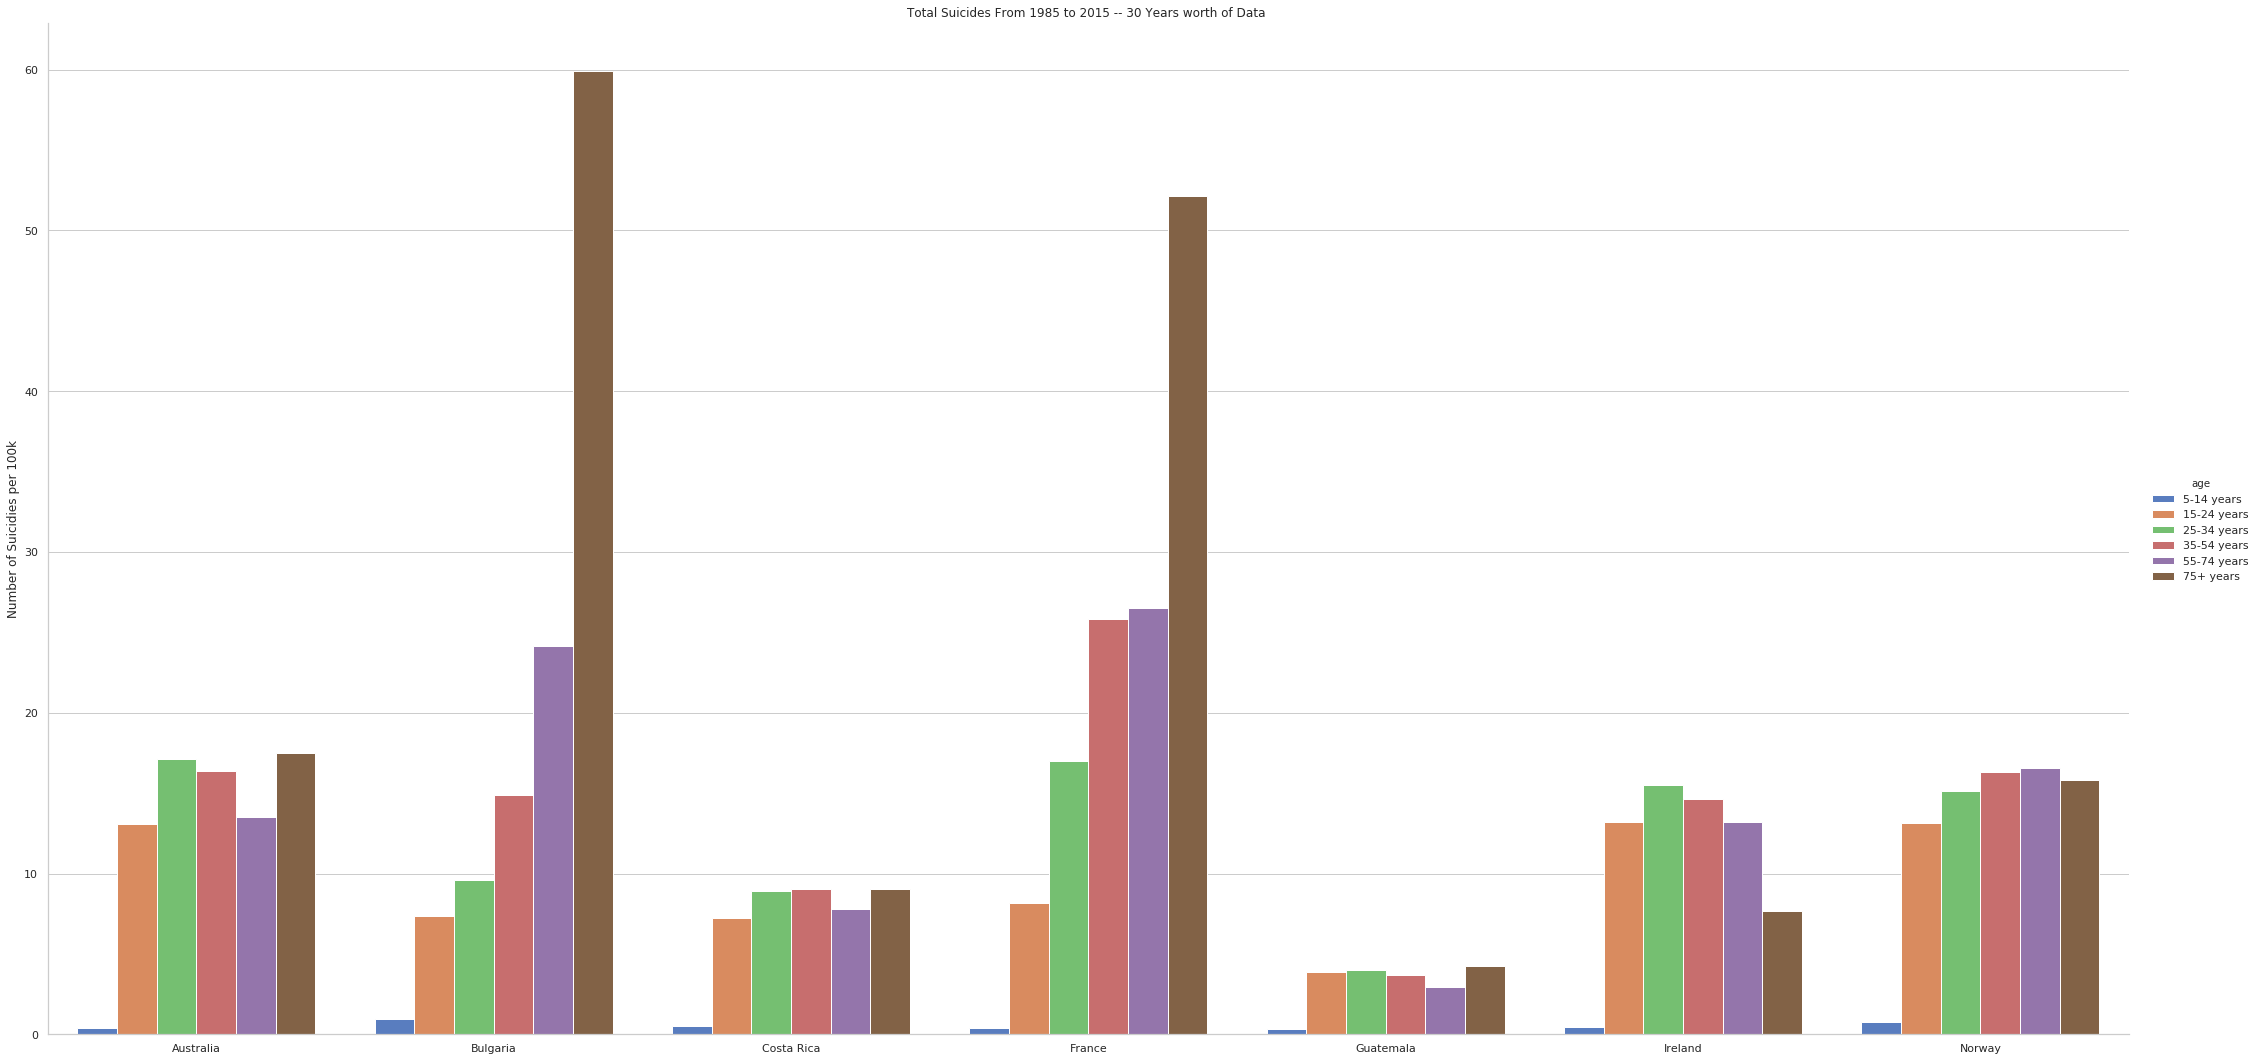

In [24]:
def RatioSuicidesPerCounty(all_or_numbers,factor,order):
    if all_or_numbers == True:
        for i in TotalSuicides(["Country",factor],seperate = True,suicides_no=False):
            sns.set(style="whitegrid")
            plot = sns.catplot(x="Country", y="suicid_ratio_100K", data=i[0] ,hue=factor, kind="bar", palette="muted",height=15, aspect=2,hue_order=order)
            plt.title("Total Suicides From 1985 to 2015 -- {} Years worth of Data ".format(i[1]))
            plot.set_axis_labels("", "Number of Suicidies per 100k")
        return plot
    else:
        for i in TotalSuicides(["Country",factor],seperate = True,suicides_no=False):
            if i[1] in all_or_numbers:
                sns.set(style="whitegrid")
                plot = sns.catplot(x="Country", y="suicid_ratio_100K", data=i[0] ,hue=factor, kind="bar", palette="muted",height=15, aspect=2,hue_order=order)
                plt.title("Total Suicides From 1985 to 2015 -- {} Years worth of Data ".format(i[1]))
                plot.set_axis_labels("", "Number of Suicidies per 100k")
        return plot
 
RatioSuicidesPerCounty(all_or_numbers=[30,31],factor="age",order=age_order)

Based on the countires with 30 and 31 years of data,   higher suicides ratio are in the age group 75+. This concurs to our statement above

In [25]:
def groupSexRatio (groupName,order,suicides_no):
    if suicides_no==False:
        groupSexRatio = Ratio(TotalSuicides([groupName,"sex"],seperate = False,suicides_no=False),
                          factors=[groupName],name="Ratio",numerator="suicid_ratio_100K",denominator="Total",suicides_no=False)
    else:
        groupSexRatio = Ratio(TotalSuicides([groupName,"sex"],seperate = False,suicides_no=True),
                          factors=[groupName],name="Ratio",numerator="suicides_no",denominator="Total",suicides_no=True)
    

    sns.set(style="whitegrid")



    # Plot the Males
    if suicides_no==False:
        sns.set_color_codes("muted")
        plot = sns.catplot(x=groupName, y="suicid_ratio_100K", data=groupSexRatio,
                    color="b",order=order,hue="sex", kind="bar", palette="muted",height=15, aspect=2)
        plot.set_axis_labels("", "Number of Suicidies")
        return plot
    else:
        groupSexRatio = groupSexRatio.loc[groupSexRatio["sex"]=="male"]
        f, ax = plt.subplots(figsize=(15, 10))
        # Plot the total 
        sns.set_color_codes("pastel")
        plot = sns.barplot(x=groupName, y="Total", data=groupSexRatio,
        label="Total", color="b" ,ci=None, order=order)
        sns.set_color_codes("muted")
        plot = sns.barplot(x=groupName, y="suicides_no", data=groupSexRatio,label="Male",
                            color="b",ci=None, order=order)
        ax.legend(ncol=2, loc="upper right", frameon=True)
        ax.set( ylabel="Total Number of Suicids",
               xlabel=groupName+ "Groups")
        return plot

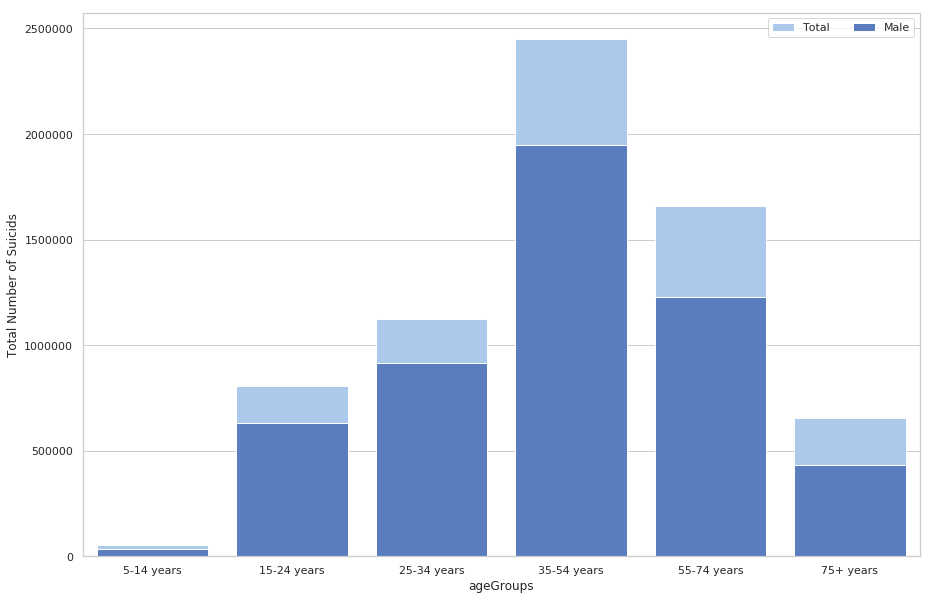

In [26]:
age_order=["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]
groupSexRatio(groupName = "age",order=age_order,suicides_no=True)

The age groups that are mainly affected by suicides are 75+ year old and the majority are males. It should be noted that  the average of the male and females of a given age group will equal to the average for the age groups which was shown in the eariler graph. 

In [27]:
def TableSexGroupRatio(groupName):
    GroupRatio = Ratio(TotalSuicides(["Country",groupName,"sex"],seperate = False,suicides_no=True),
               factors='country',name="Ratio "+ groupName +" Group",numerator="suicides_no",denominator="Total "+groupName+ " Group",suicides_no=True )
    c = GroupRatio.groupby(['country',groupName])["suicides_no"].sum().reset_index(name = "Total Sex of Age Group")
    GroupRatio = pd.merge(GroupRatio, c, on=['country',groupName], how='outer')
    GroupRatio["Ratio Sex of "+groupName+" Group"] = GroupRatio["Total Sex of Age Group"]/GroupRatio["Total "+groupName+ " Group"]
    GroupRatio["Ratio Sex of "+groupName+" Group"] = GroupRatio["Ratio Sex of "+groupName+" Group"].replace('nan', np.nan).fillna(0)

    return GroupRatio

In [28]:
def GroupCountrySexRatio (Data,groupName,hue_order_total,hue_order_group,labels):
    data = Data.loc[Data["Total " +groupName+" Group"]>0]
    for i in [31]:
        countries = countryYearCountValue.loc[countryYearCountValue["NumberOfYears"]==i]
        CountryAnalysis=pd.DataFrame() 
        for country in countries["Country"]:
            countrydf = data.loc[data["Country"]==country]
            CountryAnalysis = CountryAnalysis.append(countrydf,ignore_index=True)
        sns.set(style="whitegrid")
        f,ax = plt.subplots(figsize=(20, 30))
        # Plot the total 
        sns.catplot(x="Ratio Sex of " +groupName+ " Group", y="Country", data=CountryAnalysis,hue=groupName,
                     kind="bar", palette="dark",ax=ax, ci=None ,hue_order=hue_order_total)
        # Plot the Males
        sns.catplot(x="Ratio "+groupName+" Group", y="Country", data=CountryAnalysis,hue=groupName,
                    kind="bar", palette="pastel",ax=ax, ci=None,hue_order=hue_order_group)
        
        ax.legend(ncol=2, loc="upper right", frameon=True,labels=labels)
        ax.set( ylabel="Countries with {} Years of Data ".format(i),xlabel="Ratio in terms of "+groupName+" group")
        plt.close(2)
        plt.close(3)
        plt.show()
    

In [29]:
def CountGroupRatio(Data,groupName,order):
    result={}
    table = Data
    countries = table.Country.unique()
    groupdf=pd.DataFrame()
    for country in countries:
        newRow = pd.DataFrame()    
        ratioMax=table.loc[table["Country"]==country]["suicid_ratio_100K"].max()
        row =table.loc[(table["Country"]==country) & (table["suicid_ratio_100K"] == ratioMax)]
        newRow["Country"]=row["Country"]
        newRow[groupName]=row[groupName]
        newRow["sex"]=row["sex"]
        newRow["suicid_ratio_100K"]=row["suicid_ratio_100K"]
        groupdf=groupdf.append(newRow,ignore_index = True)
    groupName_count = groupdf.groupby([groupName,"sex"]).size().reset_index(name='Count')
    groupName_count["Ratio"] = groupName_count['Count']/groupName_count['Count'].sum()

    sns.set(style="whitegrid")
    f,ax = plt.subplots(figsize=(10, 7))
    # Plot the total 
    plot = sns.catplot(x=groupName, y="Count", data=groupName_count,hue="sex",
                 kind="bar", palette="pastel",ax=ax, ci=None, order=order)
    plt.close(2)
    return groupName_count


age     sex  Count     Ratio
0   15-24 years  female      2  0.016260
1   15-24 years    male      4  0.032520
2   25-34 years  female      2  0.016260
3   25-34 years    male     12  0.097561
4   35-54 years  female      2  0.016260
5   35-54 years    male     17  0.138211
6    5-14 years  female      2  0.016260
7    5-14 years    male      2  0.016260
8   55-74 years  female      2  0.016260
9   55-74 years    male      7  0.056911
10    75+ years  female      3  0.024390
11    75+ years    male     68  0.552846

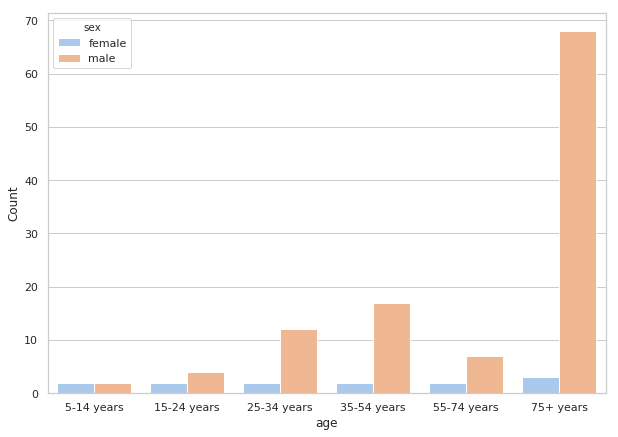

In [30]:

data =Ratio(TotalSuicides(["Country","age","sex"],seperate = False,suicides_no=False),
               factors='Country',name="Ratio "+ "age" +" Group",numerator="suicid_ratio_100K",denominator="Total "+"age"+ " Group",suicides_no=False )
order = ["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]
CountGroupRatio(Data=data,groupName="age",order=order)



Each country was split into 12 groups (6 age groups for each sex). The group with the highest suicides ratio per 100k was selected and as result,  there were over 50% of countries that had the male age group 75+ years as their highest. The second highest age group was males 35-5 year old, which only accounted for 9%.

**Generation**

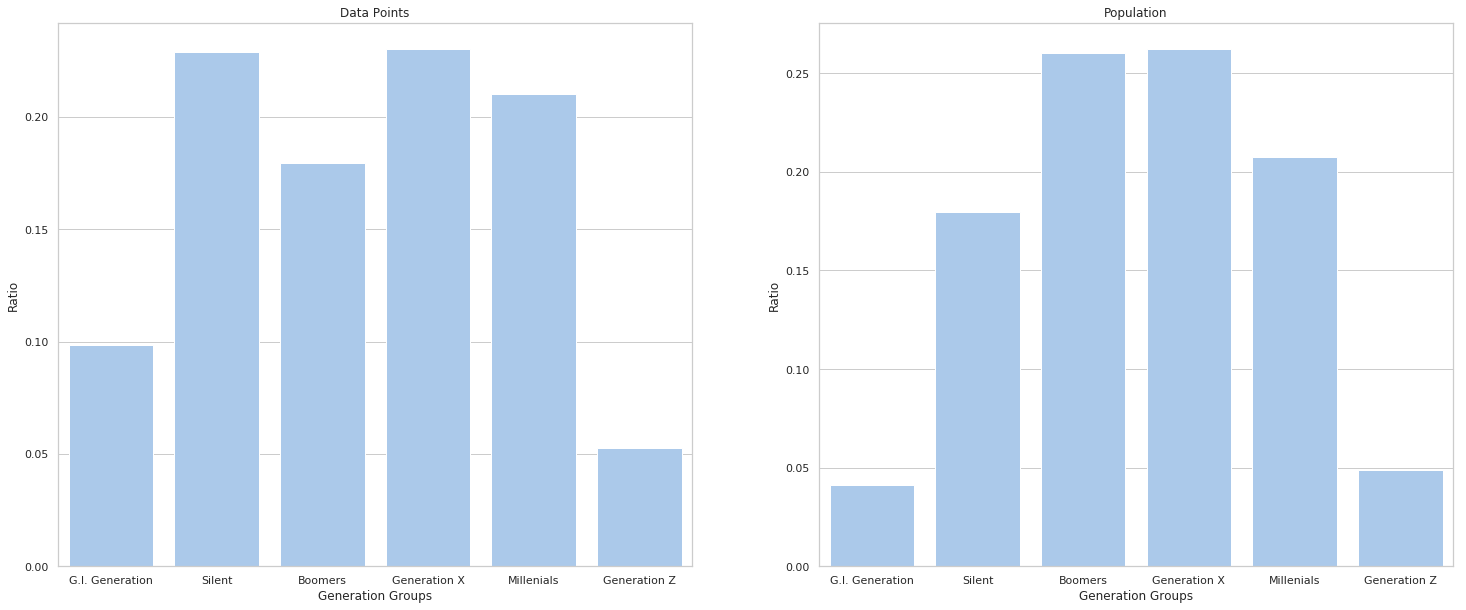

In [31]:
gen_order=["G.I. Generation","Silent","Boomers","Generation X","Millenials","Generation Z"]
ratioDataPoints = toDataFrame(data=OverallRatio(factor="generation",order=gen_order)["ratioDataPoints"],index="Generation Groups",columnName="Ratio")
ratioPopulation = toDataFrame(data=OverallRatio(factor="generation",order=gen_order)["ratioPopulation"],index="Generation Groups",columnName="Ratio")
f, ax = plt.subplots(figsize=(25, 10),ncols=2)
sns.set_color_codes("pastel")
plot = sns.barplot(x="Generation Groups", y="Ratio", data=ratioDataPoints,label="Total", color="b" ,ci=None, order=gen_order,ax=ax[0]).set_title("Data Points")
plot = sns.barplot(x="Generation Groups", y="Ratio", data=ratioPopulation,label="Total", color="b" ,ci=None, order=gen_order,ax=ax[1]).set_title("Population")


The dataset is from 1985 to 2016. Due to the span of the dataset, the GI generation and Generation Z are lower in data points and population. For the GI generation, the youngest age span is 61 to 92 while for the Generation Z, the older age span is 0 to 10 years. In fact in 1985, Generation Z didn't exist. 

In [32]:
def AgeGeneration ():
    age_order=["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]
    gen_order=["G.I. Generation","Silent","Boomers","Generation X","Millenials","Generation Z"]
    TableAgeGenerationRatio = Ratio(TotalSuicides(["generation","age"],seperate = False,suicides_no=True),factors="generation",
                                    name="Ratio age given generation",numerator="suicides_no",denominator="Total Suicides in the Generation",suicides_no=True )

    tableGenAge = TableAgeGenerationRatio.pivot(index='generation', columns='age', values='suicides_no')
    tableGenAge.fillna(0)
    tableGenAge.reindex(gen_order)
    tableGenAge1 = TableAgeGenerationRatio.pivot(index='age', columns='generation', values='suicides_no')
    tableGenAge1.reindex(age_order)
    tableGenAge1.fillna(0)
    palette = iter(sns.husl_palette(2*len(age_order)))
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(15, 10),ncols=2)
    # Plot the other age groups
    for age in reversed(age_order):
        filterTable=tableGenAge[age].reindex(gen_order).reset_index(name="suicides_no").fillna(0)
        filterTable["result"]=0    
        for gen in gen_order:
            filterTable1=tableGenAge1[gen].reindex(age_order).reset_index(name="suicides_no").fillna(0)
            filterTable1["culum"]=filterTable1["suicides_no"].cumsum()
            value = filterTable1.loc[filterTable1["age"]==age]["culum"].get_values()
            filterTable.loc[filterTable["generation"]==gen,["result"]]=value
        plot = sns.barplot(x="generation",y="result", data=filterTable,
                label=age, color=next(palette),ci=None, order=gen_order ,ax=ax[0])
        ax[0].legend(ncol=2, loc="upper right", frameon=True)
        ax[0].set( ylabel="Number of Suicides",
               xlabel="Generations")
    tableGenAge = TableAgeGenerationRatio.pivot(index='generation', columns='age', values='Ratio age given generation')
    tableGenAge.fillna(0)
    tableGenAge.reindex(gen_order)
    tableGenAge1 = TableAgeGenerationRatio.pivot(index='age', columns='generation', values='Ratio age given generation')
    tableGenAge1.reindex(age_order)
    tableGenAge1.fillna(0)
    for age in reversed(age_order):
        filterTable=tableGenAge[age].reindex(gen_order).reset_index(name="Ratio age given generation").fillna(0)
        filterTable["result"]=0    
        for gen in gen_order:
            filterTable1=tableGenAge1[gen].reindex(age_order).reset_index(name="Ratio age given generation").fillna(0)
            filterTable1["culum"]=filterTable1["Ratio age given generation"].cumsum()
            value = filterTable1.loc[filterTable1["age"]==age]["culum"].get_values()
            filterTable.loc[filterTable["generation"]==gen,["result"]]=value
        plot = sns.barplot(x="generation",y="result", data=filterTable,
                label=age, color=next(palette),ci=None, order=gen_order,ax=ax[1] )
        ax[1].legend(ncol=2, loc="upper right", frameon=True)
        ax[1].set( ylabel="Ratio of Suicides",
               xlabel="Generations")
    return plot

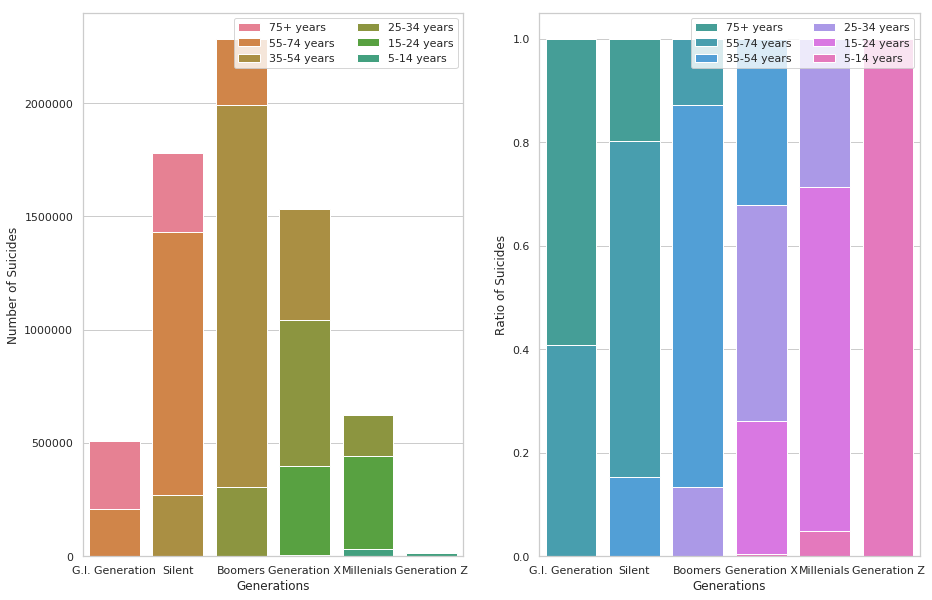

In [33]:
AgeGeneration()

From the above plot, we see that the GI generation has 2 age groups, Generation Z has one age group and the other generations have 3 age groups. 

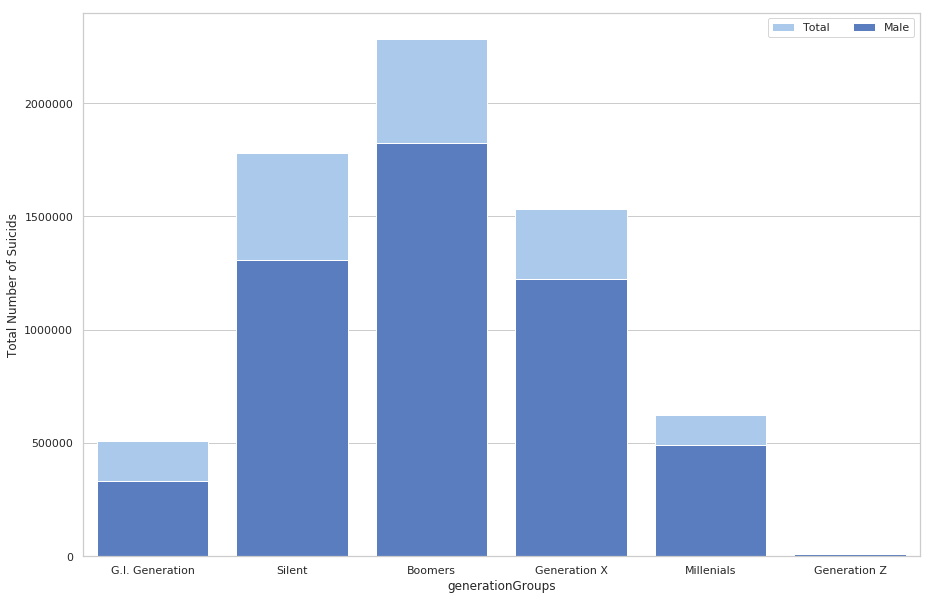

In [34]:
groupSexRatio(groupName = "generation",order=["G.I. Generation","Silent","Boomers","Generation X","Millenials","Generation Z"],suicides_no=True)

If we look at the total number of suicides, it shows that the Boomers have more suicides. As explained eariler, there are more data points and a population in the other generations. 

In [35]:
TableAgeGenerationRatio = Ratio(TotalSuicides(["generation","age"],seperate = False,suicides_no=True),factors="generation",name="Ratio age given generation",
                                numerator="suicides_no",denominator="Total Suicides in the Generation",suicides_no=True )

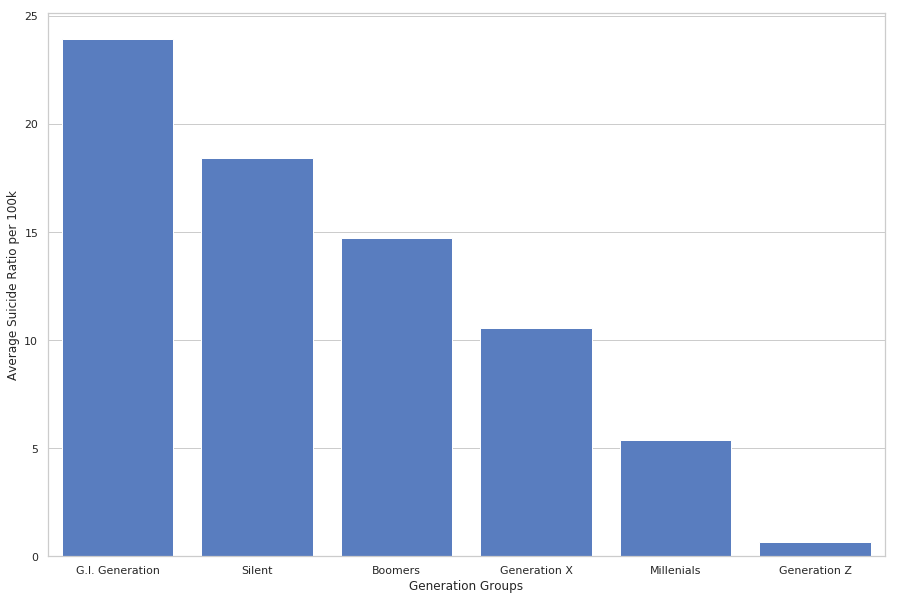

In [36]:
average_Suicide_Ratio = toDataFrame(data=averageSuicideRatio(factor="generation",order=gen_order),index="Generation Groups",columnName="Average Suicide Ratio per 100k")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.barplot(x="Generation Groups", y="Average Suicide Ratio per 100k", data=average_Suicide_Ratio,color="b",ci=None, order=gen_order)

However, if we look at the ratio of suicides per 100k, the GI generation has the most suicides. This is due to the age group 75+ having the highest ratio of suicides per 100K since the age group 75+ makes almost 60% of the GI generation. 

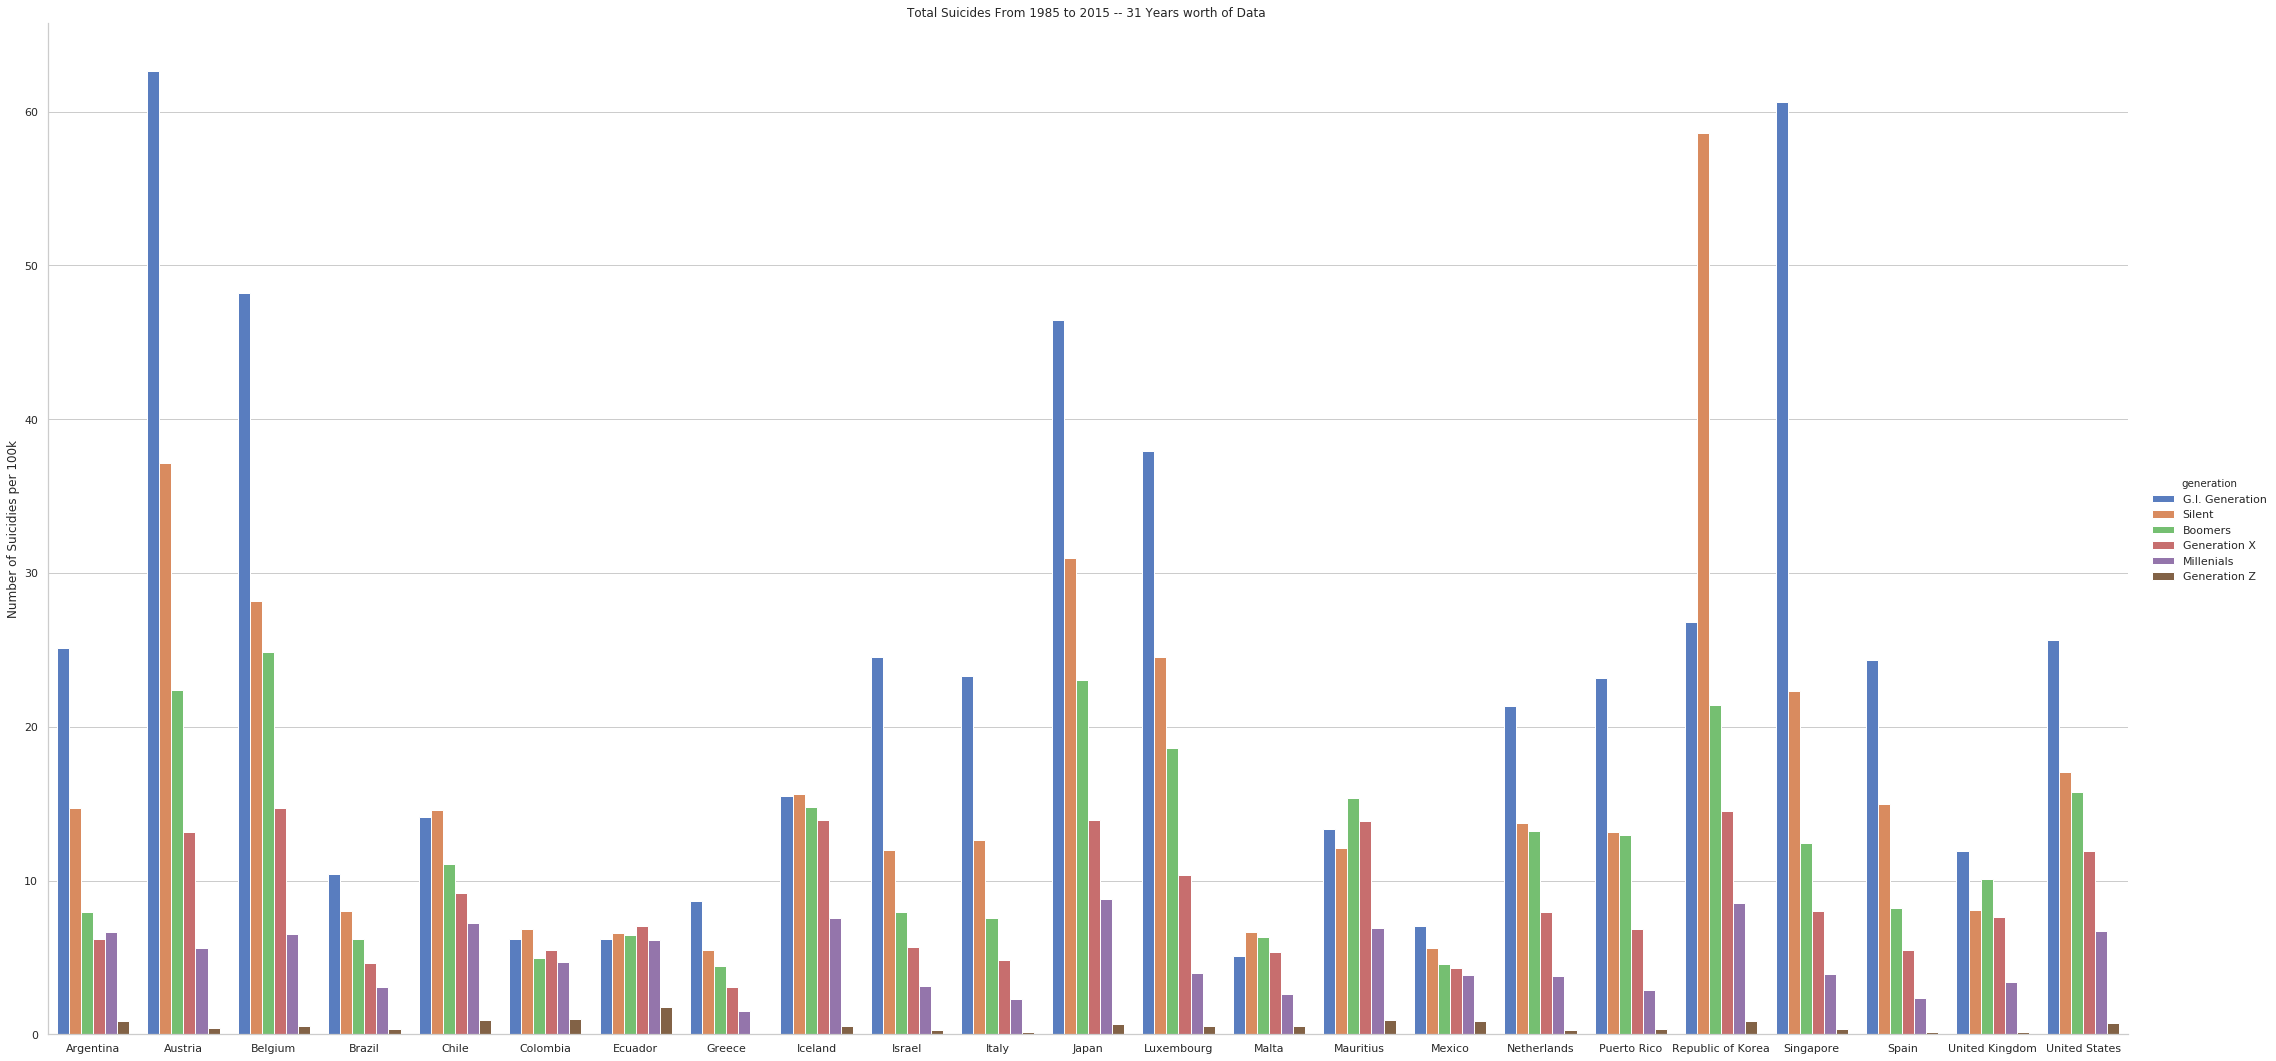

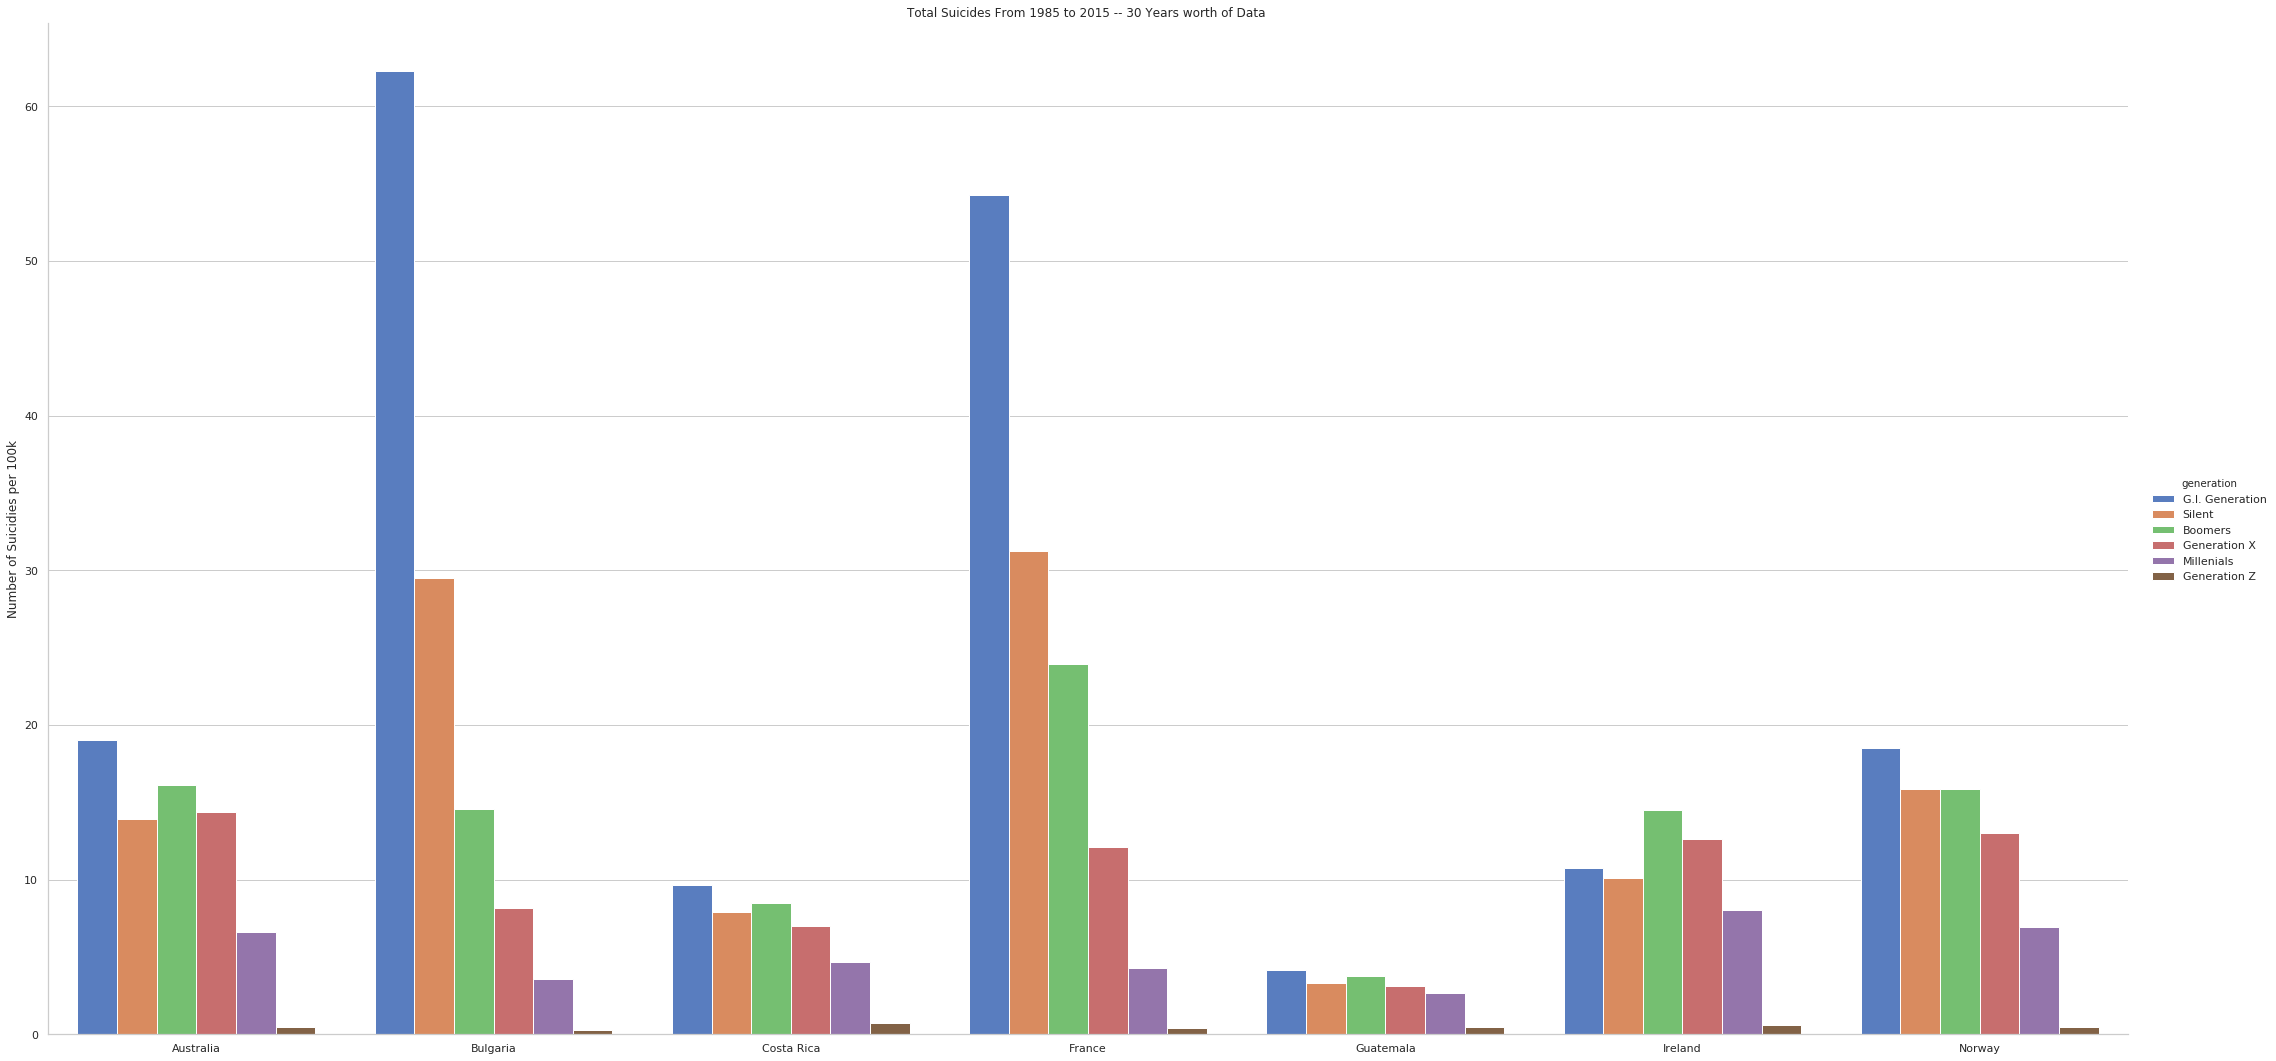

In [37]:
RatioSuicidesPerCounty(all_or_numbers=[30,31],factor="generation",order=gen_order)

Based on the countries with 30 and 31 years of data, we can see that the GI generation has the majority. This concurs with our statement above.

generation     sex  Count     Ratio
0          Boomers  female      2  0.017094
1          Boomers    male     13  0.111111
2  G.I. Generation  female      2  0.017094
3  G.I. Generation    male     58  0.495726
4     Generation X  female      2  0.017094
5     Generation X    male      6  0.051282
6       Millenials  female      1  0.008547
7       Millenials    male      3  0.025641
8           Silent  female      3  0.025641
9           Silent    male     27  0.230769

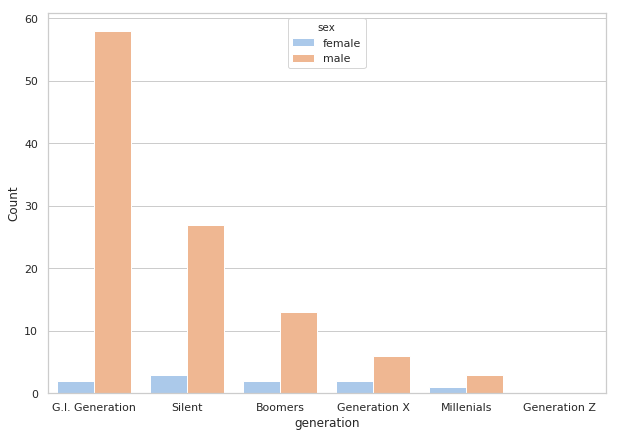

In [38]:
order=["G.I. Generation","Silent","Boomers","Generation X","Millenials","Generation Z"]
data =Ratio(TotalSuicides(["Country","generation","sex"],seperate = False,suicides_no=False),
               factors='Country',name="Ratio "+ "generation" +" Group",numerator="suicid_ratio_100K",denominator="Total "+"generation"+ " Group",suicides_no=False )
CountGroupRatio(Data=data,groupName="generation",order=order)


Each country was split into 12 groups (6 generation groups for each sex). The group with the highest suicides was selected and as result, all the groups were men and there were about 50% of countries that had the male in the GI generation as their highest. The second highest age group was males in the Silent, which only accounted for 23%. 

**GDP**

We will look at the correlation between the suicide rate per 100K and GDP per capita. Since the GDP per capita is one figure per year, we will **not** average the suicide rates per 100K as we group the age and sex of each country per year as previously. We will simply take the ratio of summation of the total suicides in the year against the summation of the population for the given country and year.

The 100(1-α)% confidence interval of the perason correlation is defined as:
 ($\frac{e^{2L} - 1}{e^{2L} + 1}$,$\frac{e^{2U} - 1}{e^{2U} + 1}$) 
         where U = Z_r + $\frac{z^{1} - { α\over 2}}{\sqrt{N-3}}$
         and L = Z_r - $\frac{z^{1} - { α\over 2}}{\sqrt{N-3}}$

As a result, N needs to be larger than 3 to have a confidence Interval. We now have 93 countries. 

In [39]:
dataPoints = dataEdit.groupby(["Country","year"]).size().reset_index(name="count")
dataPoints = dataPoints.groupby(["Country"]).size().reset_index(name="count")
dataPoints = dataPoints.loc[dataPoints["count"]>3]


In [40]:
import numpy as np
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    #    r : Pearson's correlation coefficient/ p : The corresponding p value/ lo, hi : The lower and upper bound of confidence intervals
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


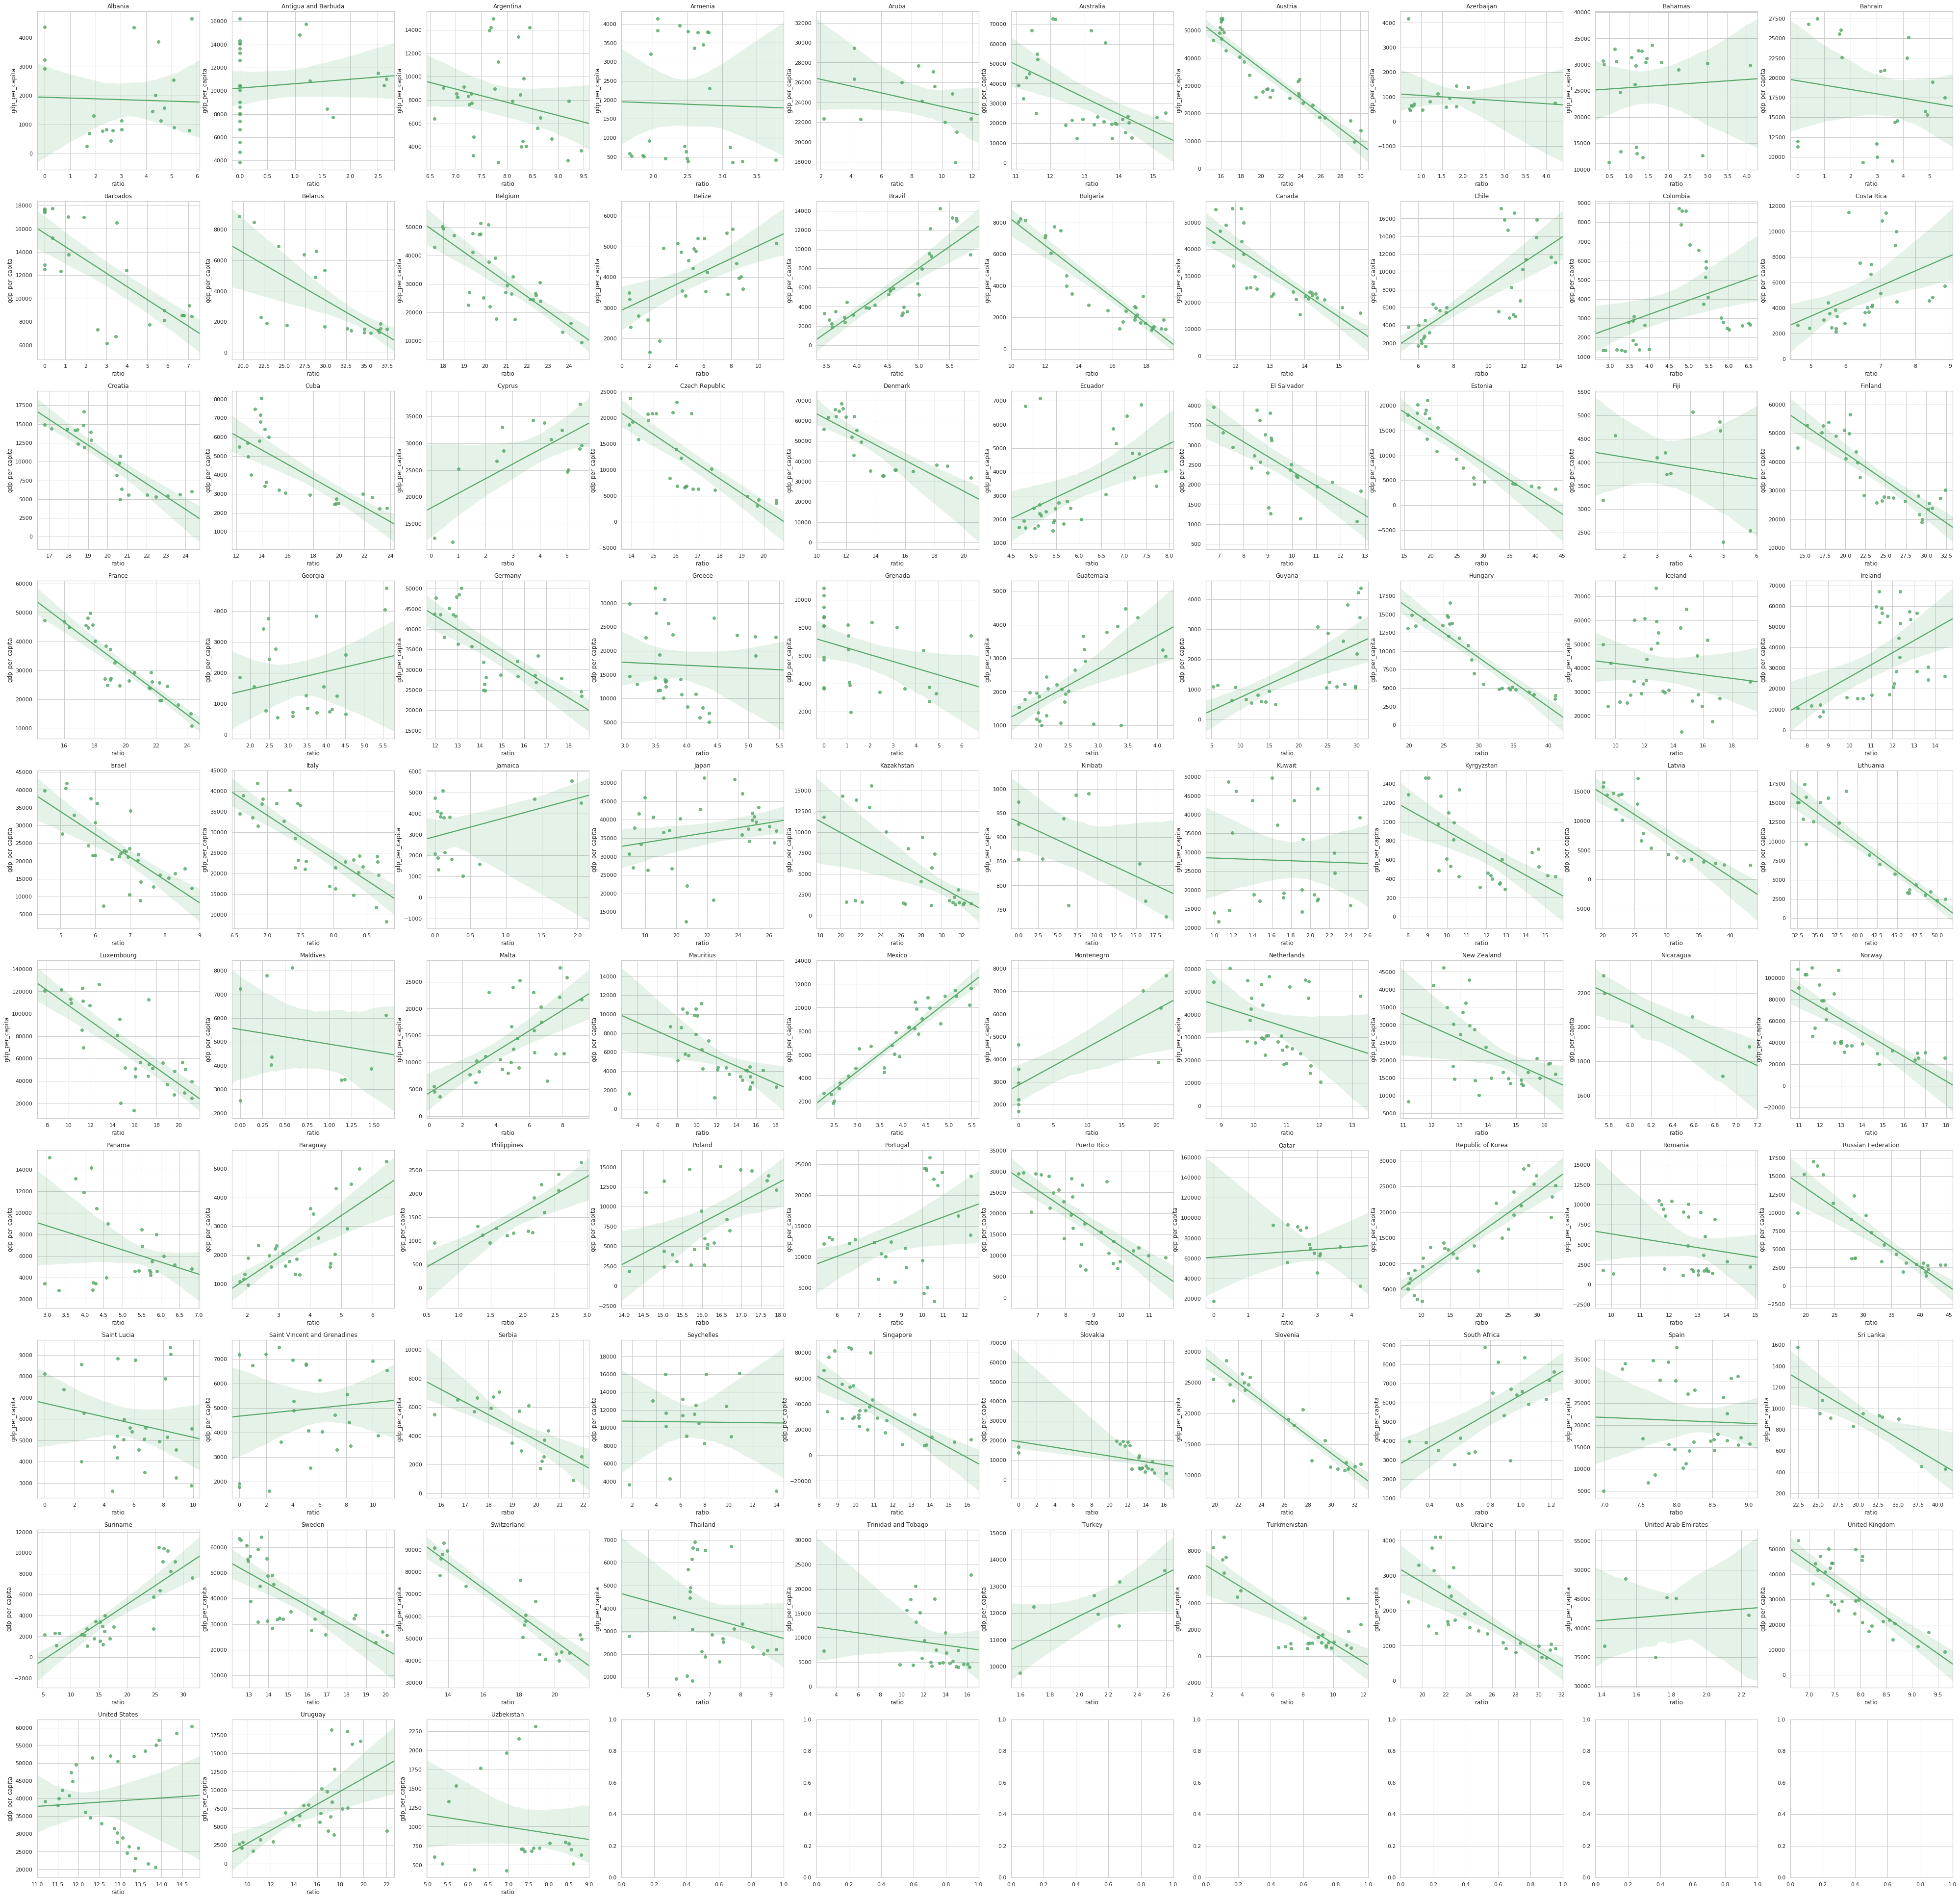

In [41]:

data =TotalSuicides(["Country","year"],seperate = False,suicides_no=True)
data["ratio"]=data["suicides_no"]/data["population"]*100000
f, ax = plt.subplots(figsize=(70, 70),nrows=10, ncols=10)
columns=("Country", "Correlation", "P-Value","Confidence Interval Lower","Confidence Interval Higher")
corrCountry =  pd.DataFrame(columns=columns)
for counter, country in enumerate (dataPoints.Country.unique()):
    x = int(counter/10)
    y= counter%10
    dataCountry = data.loc[data["Country"]==country]
    xdata = dataCountry["ratio"]
    ydata = dataCountry["gdp_per_capita"]
    corr = pearsonr_ci(xdata,ydata,alpha=0.05)
    row=[country]
    for i in corr:
        row.append(i)
    corrCountry.loc[counter]=row
    plot = sns.regplot(data=dataCountry.loc[dataCountry["Country"]==country],x="ratio",y="gdp_per_capita",ax=ax[x][y],color="g").set_title(country)



Text(0.5, 1.0, 'Correlation of GDP and ratio of Suicides per 100K with confidence Interval')

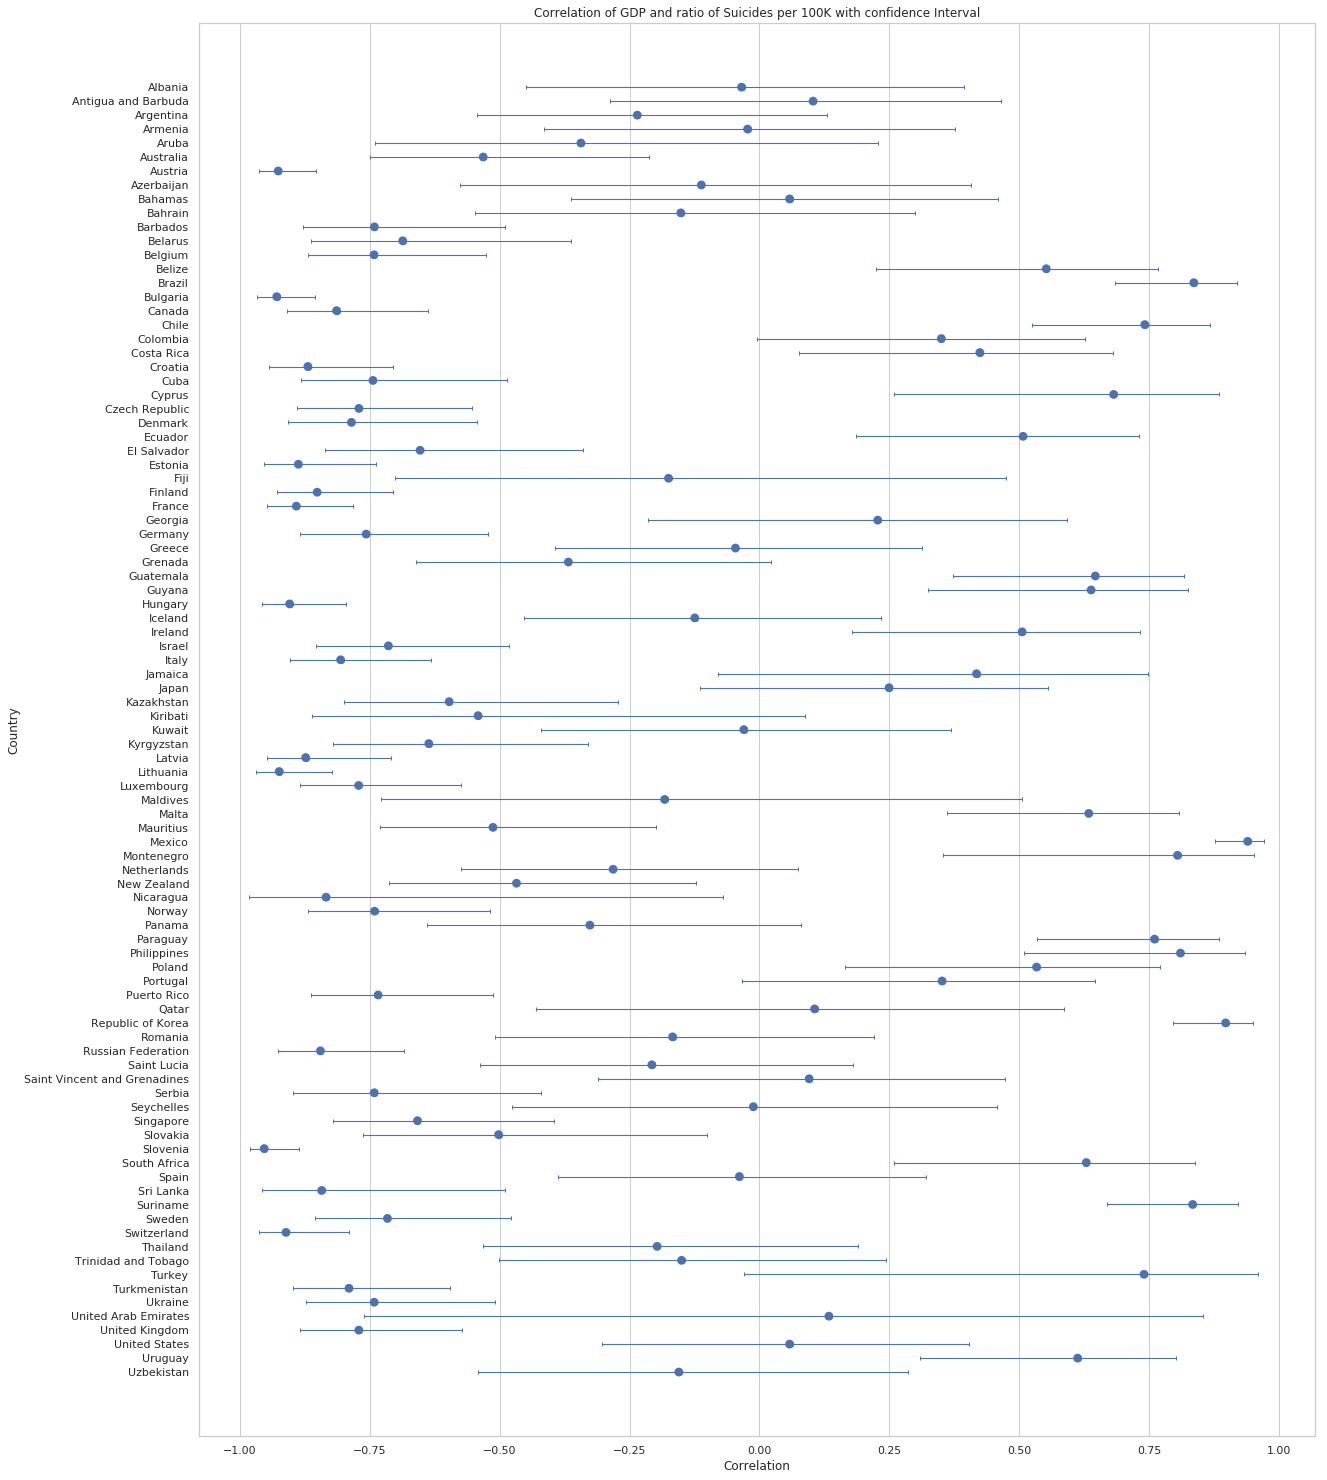

In [42]:

fig, ax = plt.subplots(figsize=(20,26))
g=sns.pointplot(x="Correlation", y="Country", data=corrCountry,join=False,ax=ax)
Y = corrCountry["Country"].values
X = corrCountry["Correlation"].values
corrCountry["low"] = corrCountry["Correlation"]-corrCountry["Confidence Interval Lower"]
corrCountry["high"] = corrCountry["Confidence Interval Higher"]-corrCountry["Correlation"]
L = corrCountry["low"].values
H = corrCountry["high"].values
error=[L,H]
g.errorbar(X, Y, xerr=error,fmt='o', capsize=2, elinewidth=1.1)
g.set_title("Correlation of GDP and ratio of Suicides per 100K with confidence Interval")


Countries such as Austria which have 31 years of data have relatively low confidence intervals while Turkey has high confidence intervals because it has only 7 years of data.

Text(0.5, 1.0, 'Correlation of GDP per Capita and suicide Ratio per 100K')

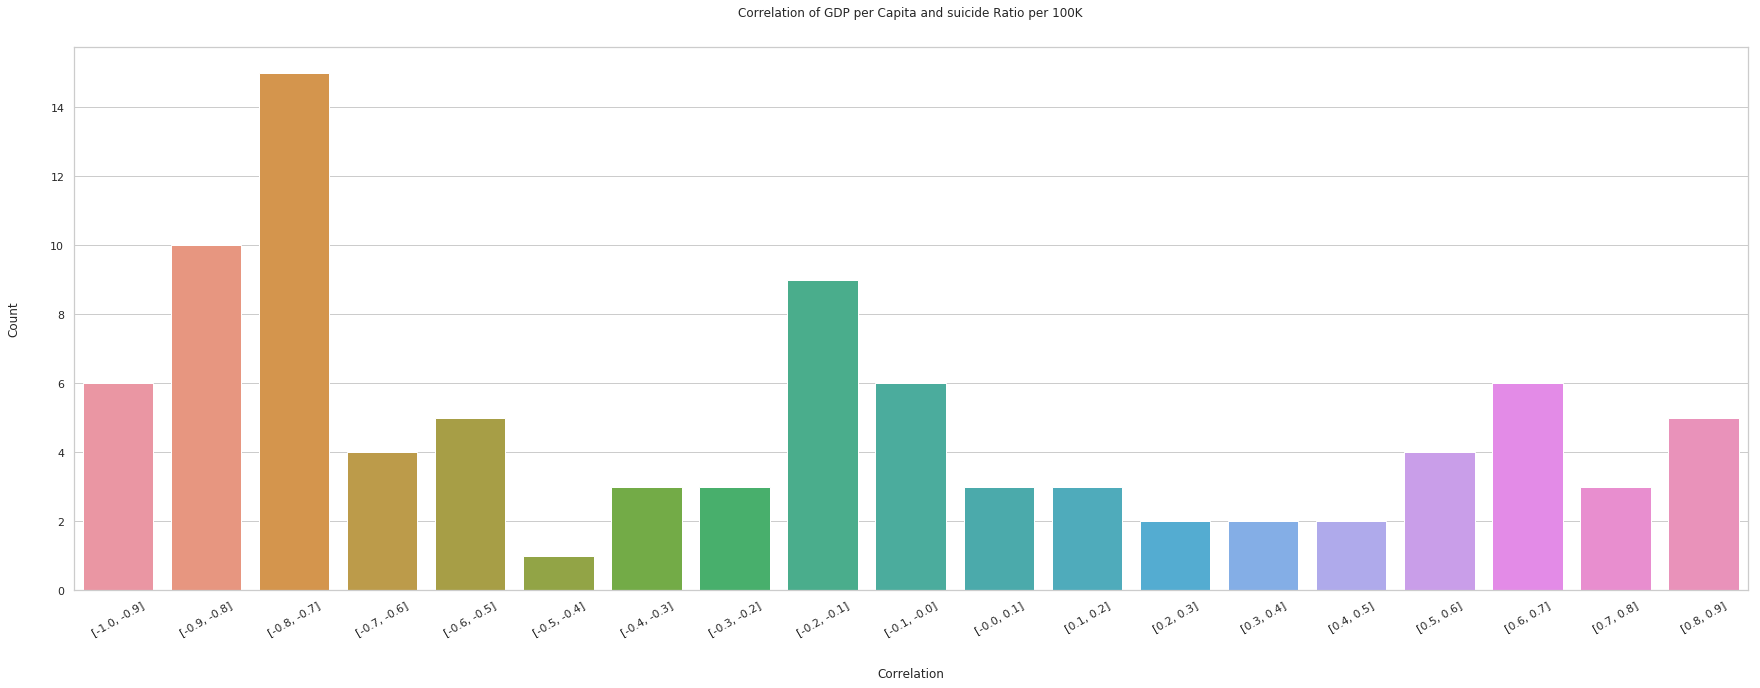

In [43]:
fig, ax = plt.subplots(figsize=(30,10))
bins = np.arange(-1,1,0.1)
x_axis = []
for i in range(0,len(bins)-1):
    point = [round(bins[i],1),round(bins[i+1],1)]
    x_axis.append(point)  
corrCountry['binned'] = pd.cut(corrCountry['Correlation'], bins)

plot = sns.countplot(x="binned",data=corrCountry)
plot.set_xticklabels(x_axis, rotation=30)
plot.set_xlabel("Correlation",labelpad = 30)
plot.set_ylabel("Count",labelpad = 30)
plot.set_title("Correlation of GDP per Capita and suicide Ratio per 100K",pad = 30)

In [44]:
correlationDescribe = corrCountry["Correlation"].describe()
correlationDescribe

count    93.000000
mean     -0.199914
std       0.586812
min      -0.952946
25%      -0.741679
50%      -0.207094
75%       0.249319
max       0.939273
Name: Correlation, dtype: float64

We can see there the correlation is postively skewed meaning there are more countries that have a negative correlation than a positive correlation. As a result, as GDP per capita falls, we will see more suicides ratio per 100K. 

**Merging the Human Development Reports**

In [45]:
dataHDI = pd.read_csv('../input/human-development-index-hdi/HDI.csv')
dataHDI1 = pd.read_csv('../input/human-development-index-hdi/HDI.csv')
dataHDICountry = dataHDI["Country"].unique()
dataEditCountry = dataEdit["Country"].unique()
countriesNotInHDI = []
for country in dataEditCountry:
    if country not in dataHDICountry:
        countriesNotInHDI.append(country)
print(countriesNotInHDI)

['Aruba', 'Macau', 'Puerto Rico', 'Republic of Korea', 'Saint Vincent and Grenadines']


The Human Development Reports will allow an analysis on the impact of HDI and other economic-social factors on suicide rates. There isn't a description of the data so I will assume columns without a description of year is taken in 2015. In addition, there are 5 countries 'Aruba', 'Macau', 'Puerto Rico', 'Republic of Korea', 'Saint Vincent and Grenadines' that are no in the HDI.

We will initially look at impacts of all social economic factors in the Human Development Report where the data was taken in 2015.

In [46]:

oldColumnName = dataHDI.columns
newColumnName= dataHDI1.columns.str.replace(" ","")
diffColumn = dict(zip(oldColumnName, newColumnName))
dataHDI1.rename(columns=diffColumn, inplace=True)
HDI2015 = dataHDI1.filter(regex="^[A-Za-z()%,-]+2015{1}|^[A-Za-z()%,-]+$")
HDI2015Column=HDI2015.columns
newDiffColumn={}
for col in HDI2015Column:
    newDiffColumn[col]=[k for k,v in diffColumn.items() if v == col][0]
HDI2015.rename(columns=newDiffColumn, inplace=True)
HDI2015=HDI2015.drop(columns=["Id",'Population Median age (years) 2015',"Total Population (millions) 2015","Population Urban 2015 %"])

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


We use the social economic factors to find a correlation with suicide rates. As stated above, we will look at the year 2015. We will first analyse at a country, age and sex level.

In [47]:

dataEdit2015 = dataEdit.loc[dataEdit["year"]==2015]
dataEdit2015Country=dataEdit2015.groupby(["Country"]).agg({"suicides_no":"sum","population":"sum"}).reset_index()
dataEdit2015Country["ratio"]=dataEdit2015Country["suicides_no"]/dataEdit2015Country["population"]*100000
AllDataCountry = pd.merge(dataEdit2015Country, HDI2015, on='Country')
AllDataCountry=AllDataCountry.dropna()
def correlationToRatio(data,matrix):
    columns=("ColName", "Correlation", "P-Value","Confidence Interval Lower","Confidence Interval Higher")
    corrData = pd.DataFrame(columns=columns)
    indexRatio = data.columns.tolist().index("ratio")
    for i in range(indexRatio,len(data.columns.tolist())):
        xData = data["ratio"]
        colName = data.columns.tolist()[i]
        yData=data[colName]
        corr=pearsonr_ci(x=xData,y=yData,alpha=0.05)
        row=[colName]
        for j in corr:
            row.append(j)
        corrData.loc[i]=row
    a = corrData[corrData["Correlation"].isnull()]
    corrData=corrData.dropna()
    corrData=corrData[corrData.ColName != 'ratio']
    numberCol=corrData.shape[0]
    if matrix==True:
        f, ax = plt.subplots(figsize=(70, 70),nrows=int(numberCol/5)+1, ncols=5)
        for counter,colName in enumerate (corrData.ColName.unique()):
            x = int(counter/5)
            y= counter%5
            plot = sns.regplot(data=data,x="ratio",y=colName,ax=ax[x][y],color="g").set_title(colName,pad=20)
    fig, ax1 = plt.subplots(figsize=(20,15))
    g=sns.pointplot(x="Correlation", y="ColName", data=corrData,join=False,ax=ax1)
    Y = corrData["ColName"].values
    X = corrData["Correlation"].values
    corrData["low"] = corrData["Correlation"]-corrData["Confidence Interval Lower"]
    corrData["high"] = corrData["Confidence Interval Higher"]-corrData["Correlation"]
    L = corrData["low"].values
    H = corrData["high"].values
    error=[L,H]
    g.errorbar(X, Y, xerr=error,fmt='o', capsize=2, elinewidth=1.1)
    g.set_title("Correlation of Social Economic Factors and ratio of Suicides per 100K with confidence Interval")
    plt.xlim(-1, +1)

    return 
        

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in arctanh
  import sys
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


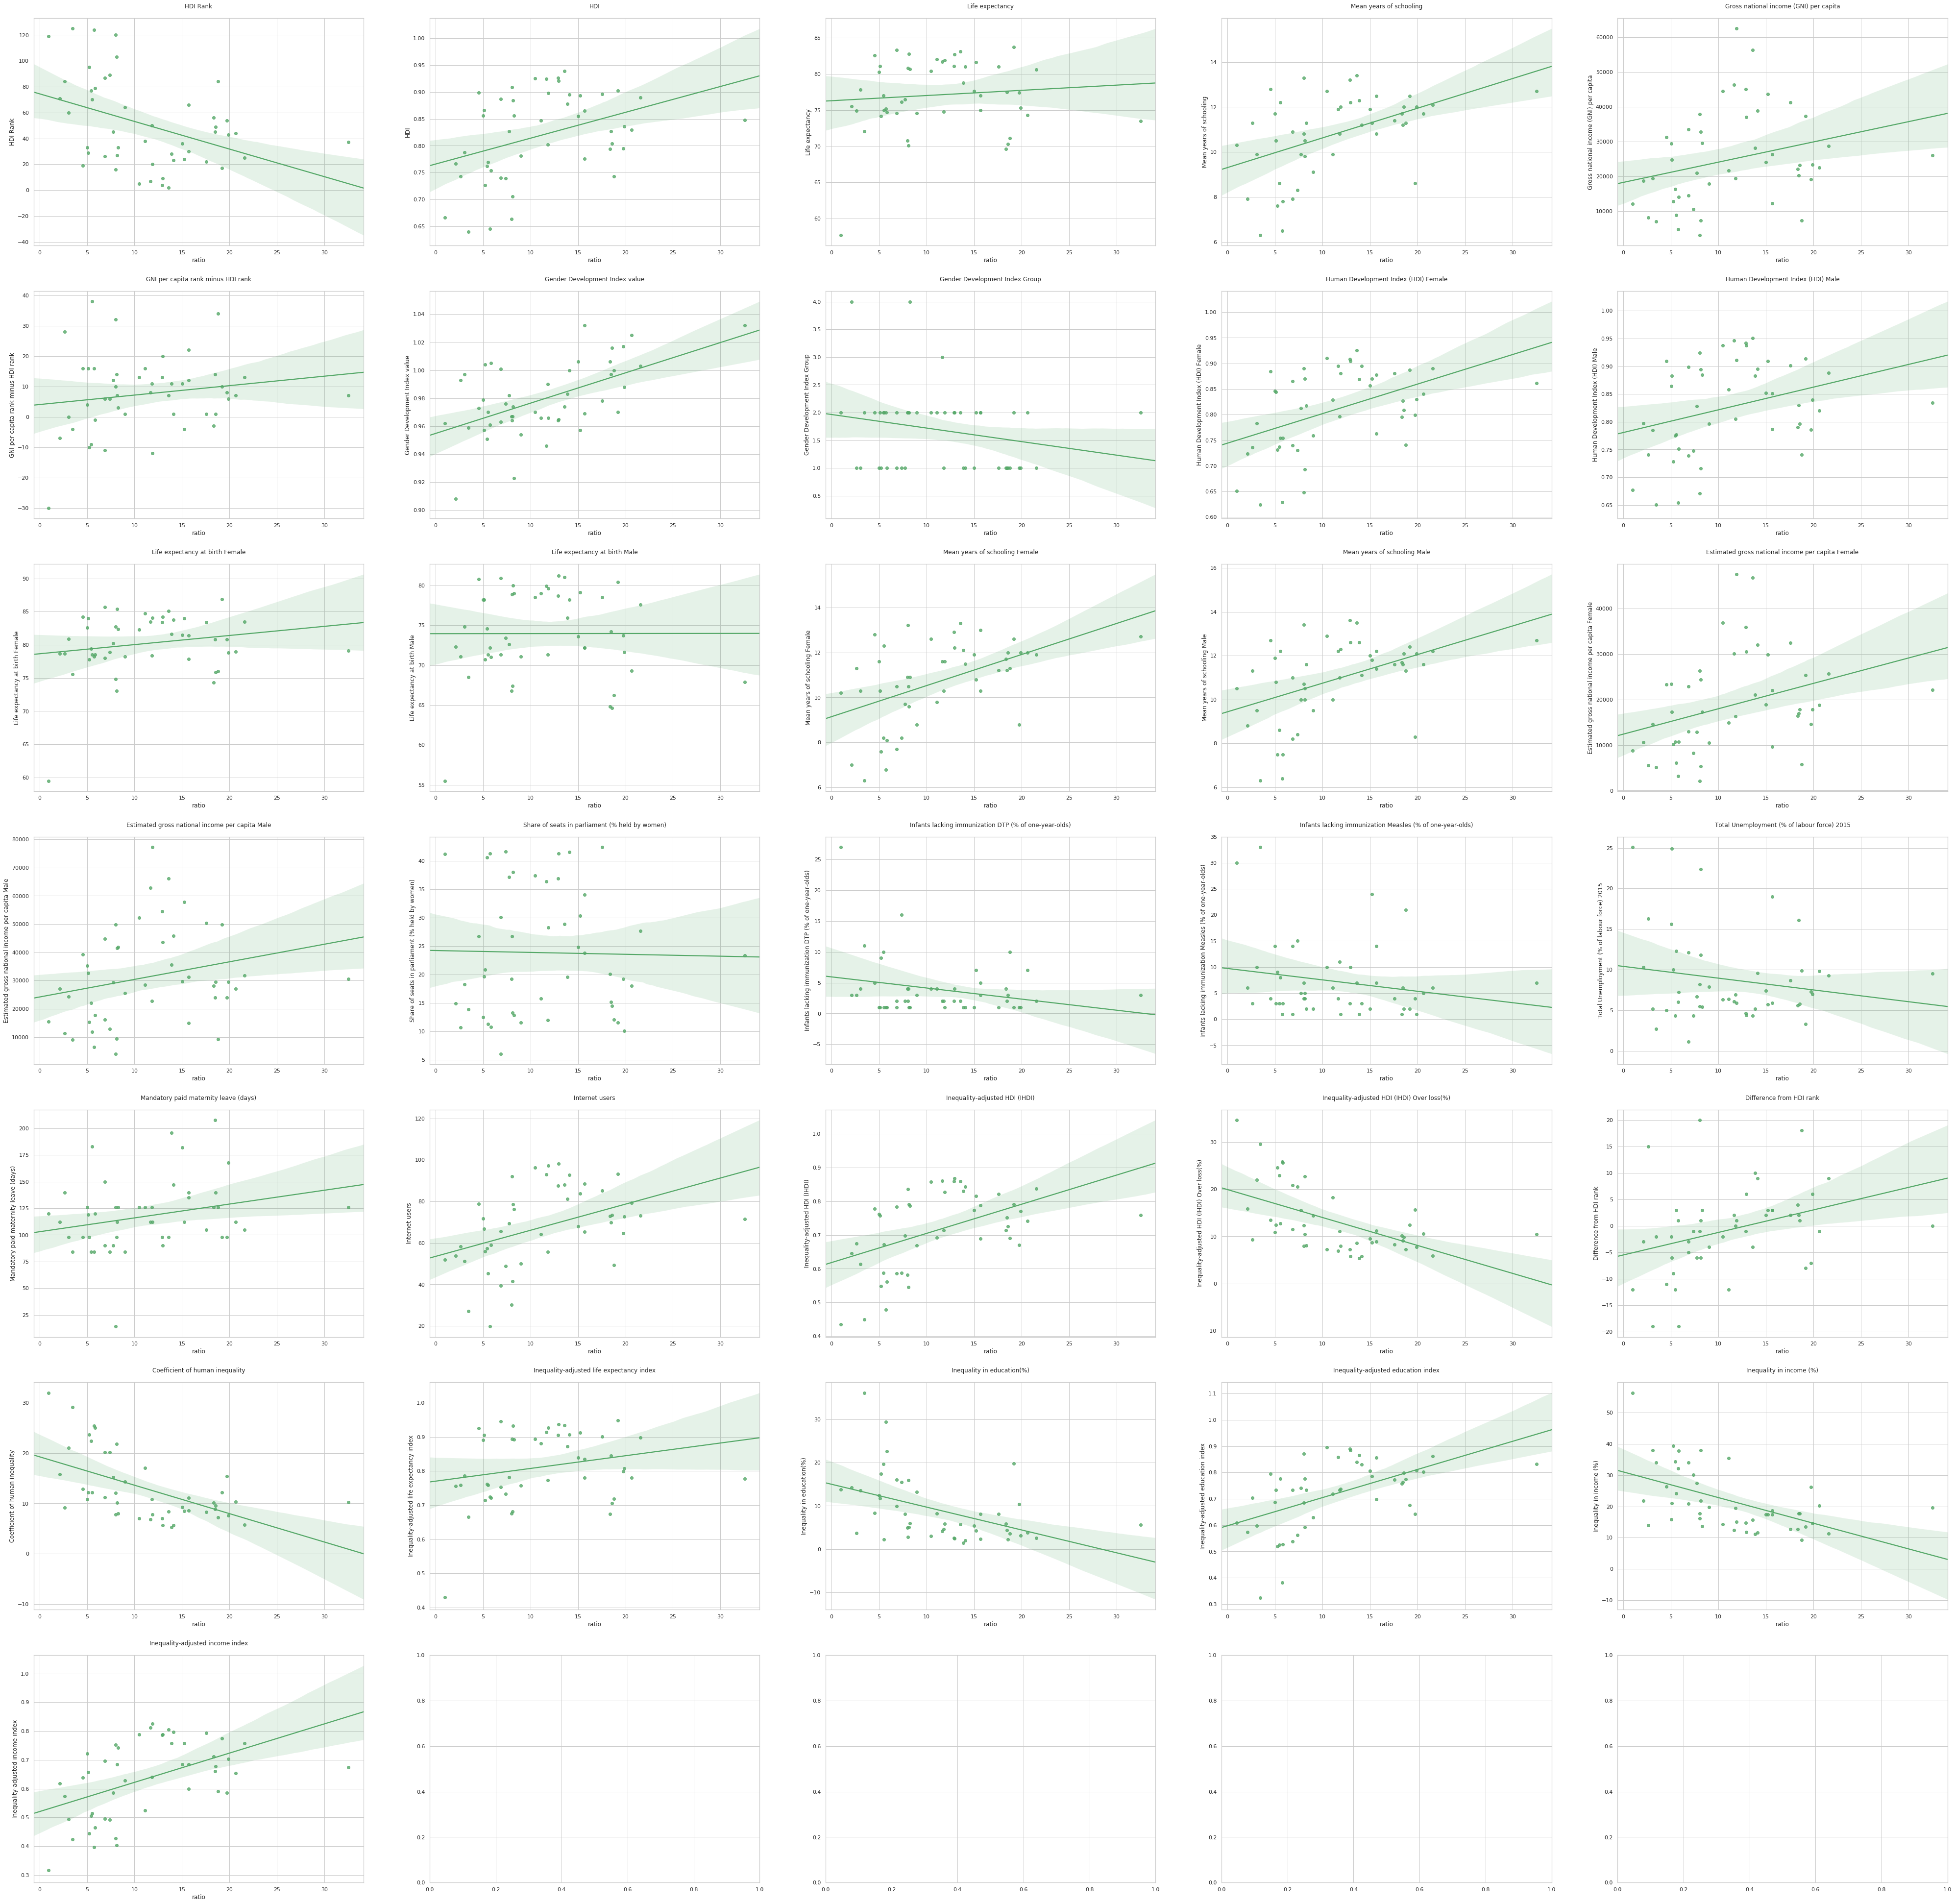

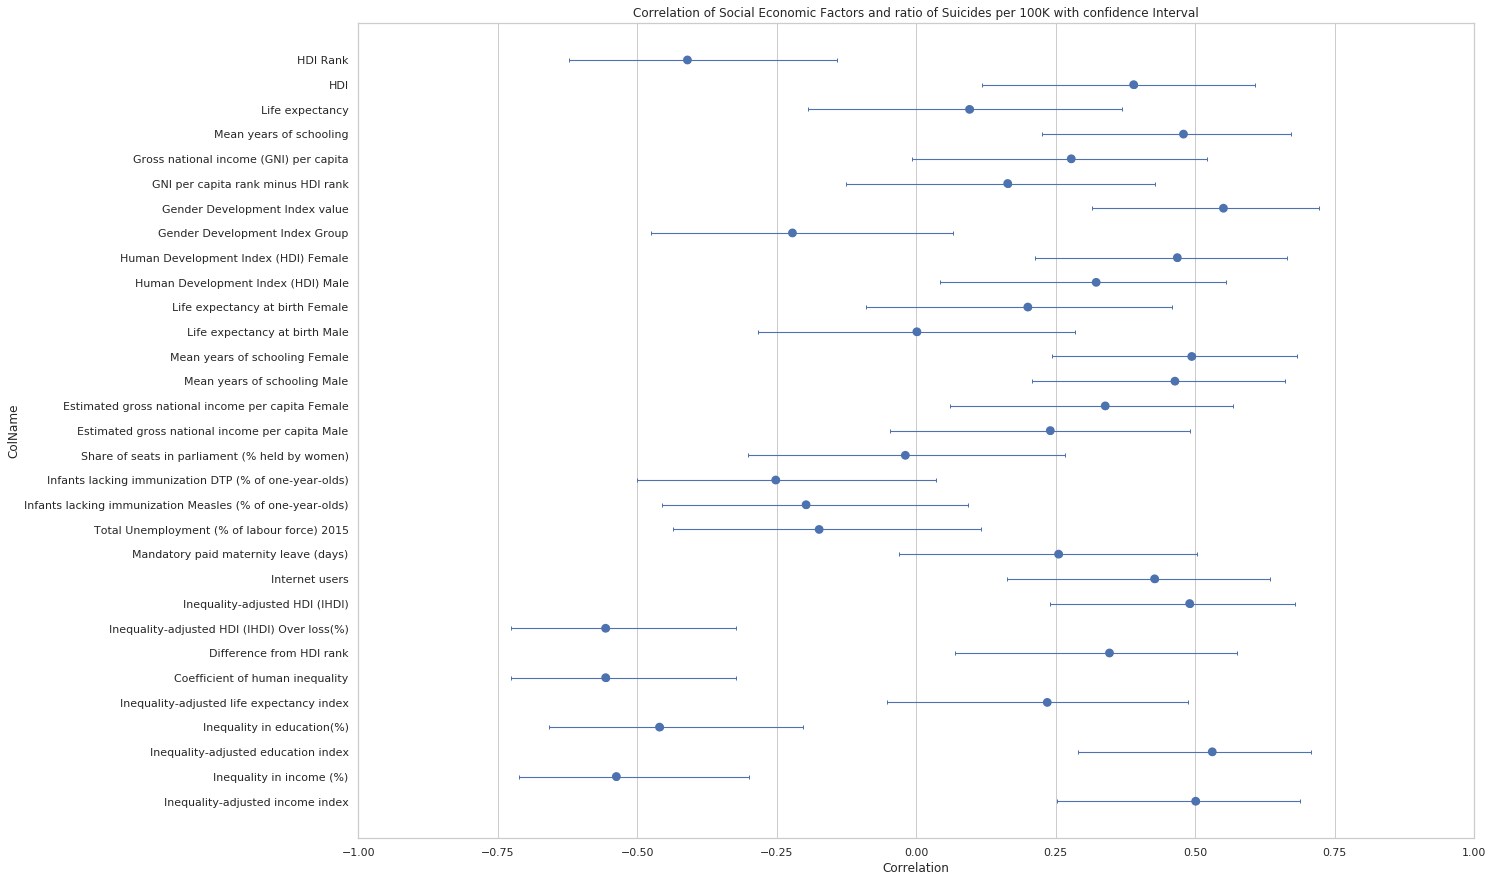

In [48]:
correlationToRatio(data=AllDataCountry,matrix=True)

According to the UNITED Nations development programme, "The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions". Its interesting to see that there is a positive relation with HDI and ratio of suicides per 100K. 

In addition, we see the means of schooling has a stronger positive relation than HDI. 

However most of the factors are in between -0.5 to 0.5 correlation (including HDI) which suggest, there isnt a strong relationship for these factors

* **Sex and Social Economic Factors**

In [49]:
dataEdit2015 = dataEdit.loc[dataEdit["year"]==2015]
dataEdit2015Sex=dataEdit2015.groupby(["Country","sex"]).agg({"suicides_no":"sum"}).reset_index()
c=dataEdit2015Sex.groupby(["Country"]).agg({"suicides_no":"sum"}).reset_index()
dataEdit2015Sex = pd.merge(dataEdit2015Sex, c, on="Country", how='outer')
dataEdit2015Sex.rename(columns={"suicides_no_x":"suicides","suicides_no_y":"Total Suicides"},inplace=True)
dataEdit2015Sex = dataEdit2015Sex.loc[dataEdit2015Sex["Total Suicides"]>0]
dataEdit2015Sex["ratio"]=dataEdit2015Sex["suicides"]/dataEdit2015Sex["Total Suicides"]
dataEdit2015Sex=dataEdit2015Sex[dataEdit2015Sex.sex != 'female']
AllDataCountrySex = pd.merge(dataEdit2015Sex, HDI2015, on='Country')



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in arctanh
  import sys


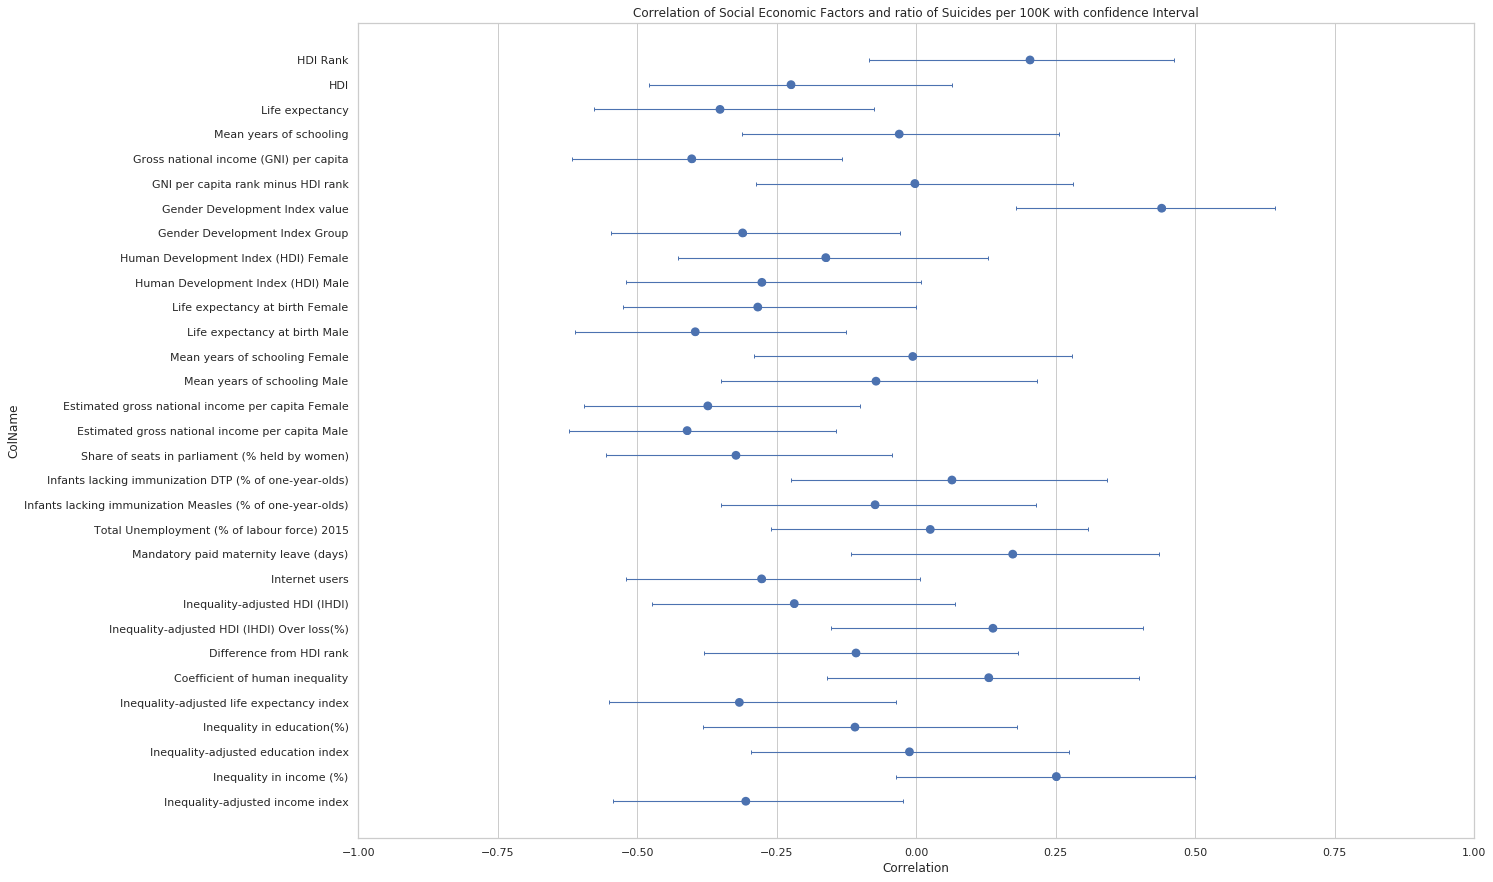

In [50]:
correlationToRatio(data=AllDataCountrySex.dropna(),matrix=False)

If we simply get the ratio of suicides of men and the total suicides (around 0.8), we can see that all the correlation is between -0.4 and 0.4 and thus these social economic factors have no effect on this ratio. The reason could be due to the concentration of ratio at 0.8 for all countries. We will now look at the ratio of sucides by men and women per population per 100k.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


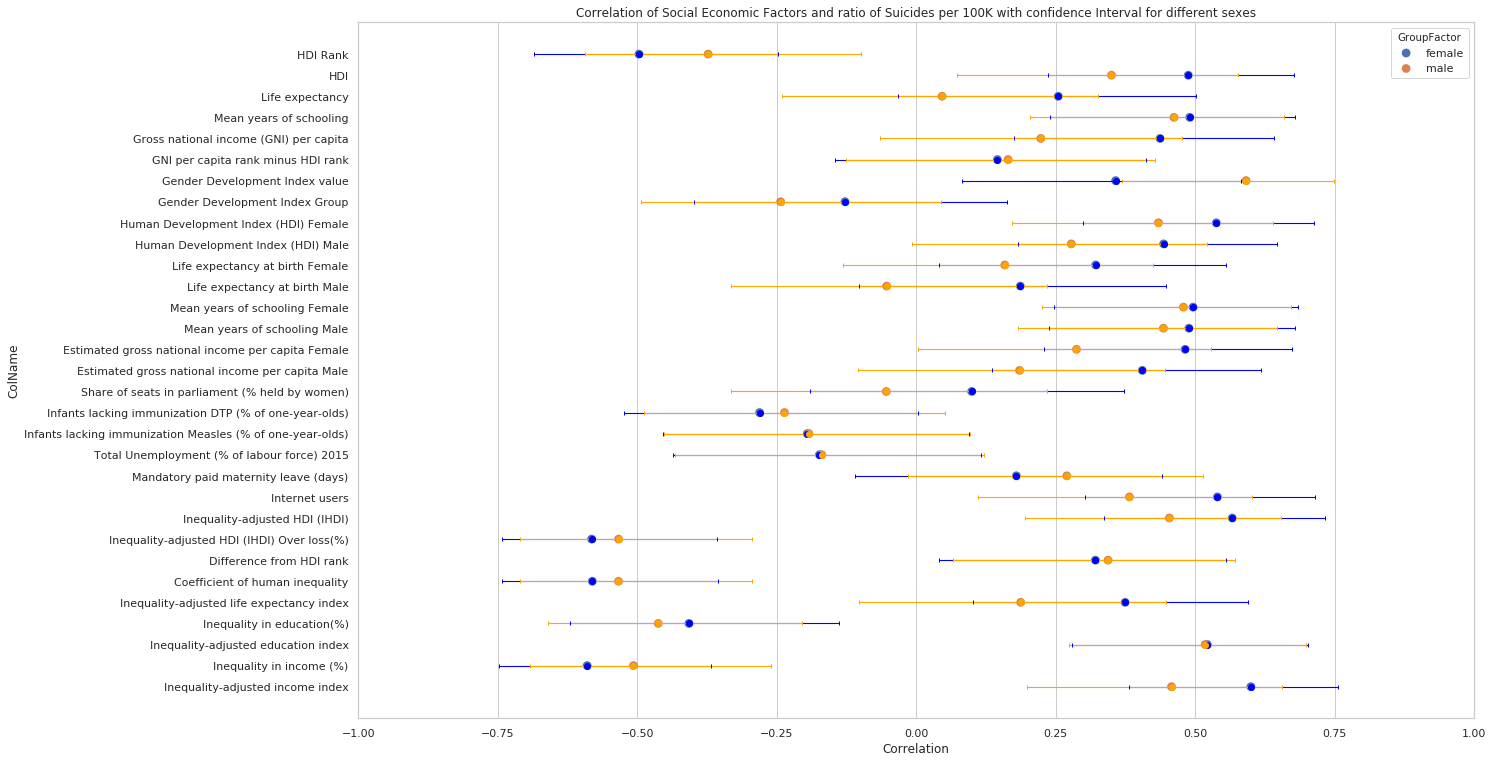

In [51]:
dataEdit2015 = dataEdit.loc[dataEdit["year"]==2015]
dataEdit2015Sex=dataEdit2015.groupby(["Country","sex"]).agg({"suicides_no":"sum","population":"sum"}).reset_index()
c=dataEdit2015Sex.groupby(["Country"]).agg({"suicides_no":"sum","population":"sum"}).reset_index()
dataEdit2015Sex = pd.merge(dataEdit2015Sex, c, on="Country", how='outer')
dataEdit2015Sex=dataEdit2015Sex.drop(columns=["population_x","suicides_no_y"])
dataEdit2015Sex.rename(columns={"suicides_no_x":"suicides","population_y":"Total Population"},inplace=True)
dataEdit2015Sex = dataEdit2015Sex.loc[dataEdit2015Sex["Total Population"]>0]
dataEdit2015Sex["ratio"]=dataEdit2015Sex["suicides"]/dataEdit2015Sex["Total Population"]*100000
dataEdit2015Sex = dataEdit2015Sex.dropna()

def correlationToRatioGroup(data,dataHDI,orders,group):

    columns=("ColName", "Correlation", "P-Value","Confidence Interval Lower","Confidence Interval Higher","GroupFactor")
    corrDataTotal = pd.DataFrame(columns=columns)
    for count, order in enumerate (orders):
        corrData = pd.DataFrame(columns=columns)
        groupData=data.loc[data[group] == order]
        AllDataCountryGroup = pd.merge(groupData, dataHDI, on='Country').dropna()       
        indexRatio = data.columns.tolist().index("ratio")
        for i in range(indexRatio+1,len(AllDataCountryGroup.columns.tolist())):
            xData = AllDataCountryGroup["ratio"]
            colName = AllDataCountryGroup.columns.tolist()[i]
            yData=AllDataCountryGroup[colName]
            corr=pearsonr_ci(x=xData,y=yData,alpha=0.05)
            row=[colName]
            for j in corr:
                row.append(j)
            row.append(order)
            corrData.loc[i]=row
        corrDataTotal=corrDataTotal.append(corrData)
    corrDataTotal=corrDataTotal.dropna()
    corrDataTotal=corrDataTotal.loc[corrDataTotal.ColName != 'ratio']
    fig, ax1 = plt.subplots(figsize=(20,len(AllDataCountryGroup.columns.tolist())*0.3+2))
    g=sns.pointplot(x="Correlation", y="ColName", data=corrDataTotal,join=False,ax=ax1,hue="GroupFactor")
    color = ["blue","orange","green","red","grey","brown"]
    for count, order in enumerate (orders):
        filteredData = corrDataTotal.loc[corrDataTotal["GroupFactor"]==order]    
        Y = filteredData["ColName"].values
        X = filteredData["Correlation"].values
        filteredData["low"] = filteredData["Correlation"]-filteredData["Confidence Interval Lower"]
        filteredData["high"] = filteredData["Confidence Interval Higher"]-filteredData["Correlation"]
        L = filteredData["low"].values
        H = filteredData["high"].values
        error=[L,H]
        g.errorbar(X, Y, xerr=error,fmt='o', capsize=2, elinewidth=1.1,color=color[count])
    g.set_title("Correlation of Social Economic Factors and ratio of Suicides per 100K with confidence Interval for different sexes")  
    plt.xlim(-1, +1)

   
    return 
correlationToRatioGroup(data=dataEdit2015Sex,dataHDI=HDI2015,orders=["female","male"],group="sex")

We can see that HDI has more positive effect on females than males implying that as the HDI increase, more females commit suicide. This is true for most of the factors. We see that gap widen in the Gender Development Index Value. Maternity paid leave has a very small effect on the suicide rates  while Inequality in income has a stronger negative correlation with suicide rates. 

In [52]:
HDISex = dataHDI[["Country",'Total fertility rate (birth per woman) 2000/2007']]
dataEdit2000_2007 = dataEdit.loc[dataEdit["year"].isin(["2000","2001","2002","2003","2004","2005","2006","2007"])]
dataEdit2000_2007Sex=dataEdit2000_2007.groupby(["Country","year","sex"]).agg({"suicides_no":"sum","population":"sum"}).reset_index()
dataEdit2000_2007Sex
dataEdit2000_2007Sex["ratio"]=dataEdit2000_2007Sex["suicides_no"]/dataEdit2000_2007Sex["population"]*100000
dataEdit2000_2007Sex=dataEdit2000_2007Sex.groupby(["Country","sex"]).agg({"ratio":"mean"}).reset_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


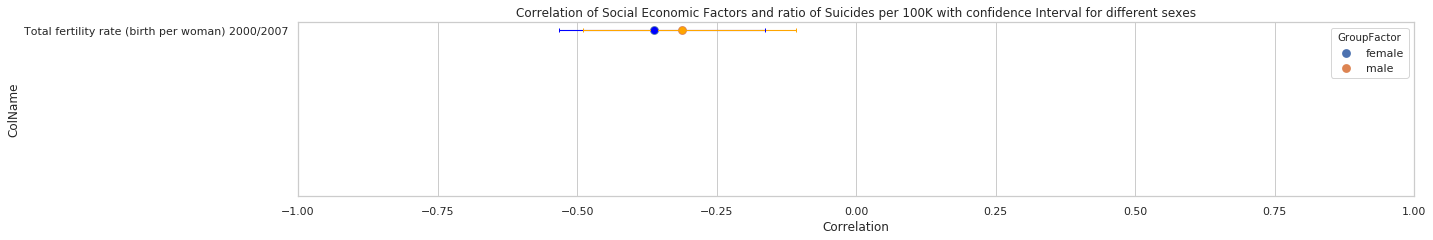

In [53]:
correlationToRatioGroup(data=dataEdit2000_2007Sex,dataHDI=HDISex,orders=["female","male"],group="sex")

The total fertality rate has a small effect on suicide rates. 

**Age and Social Economic Factors**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


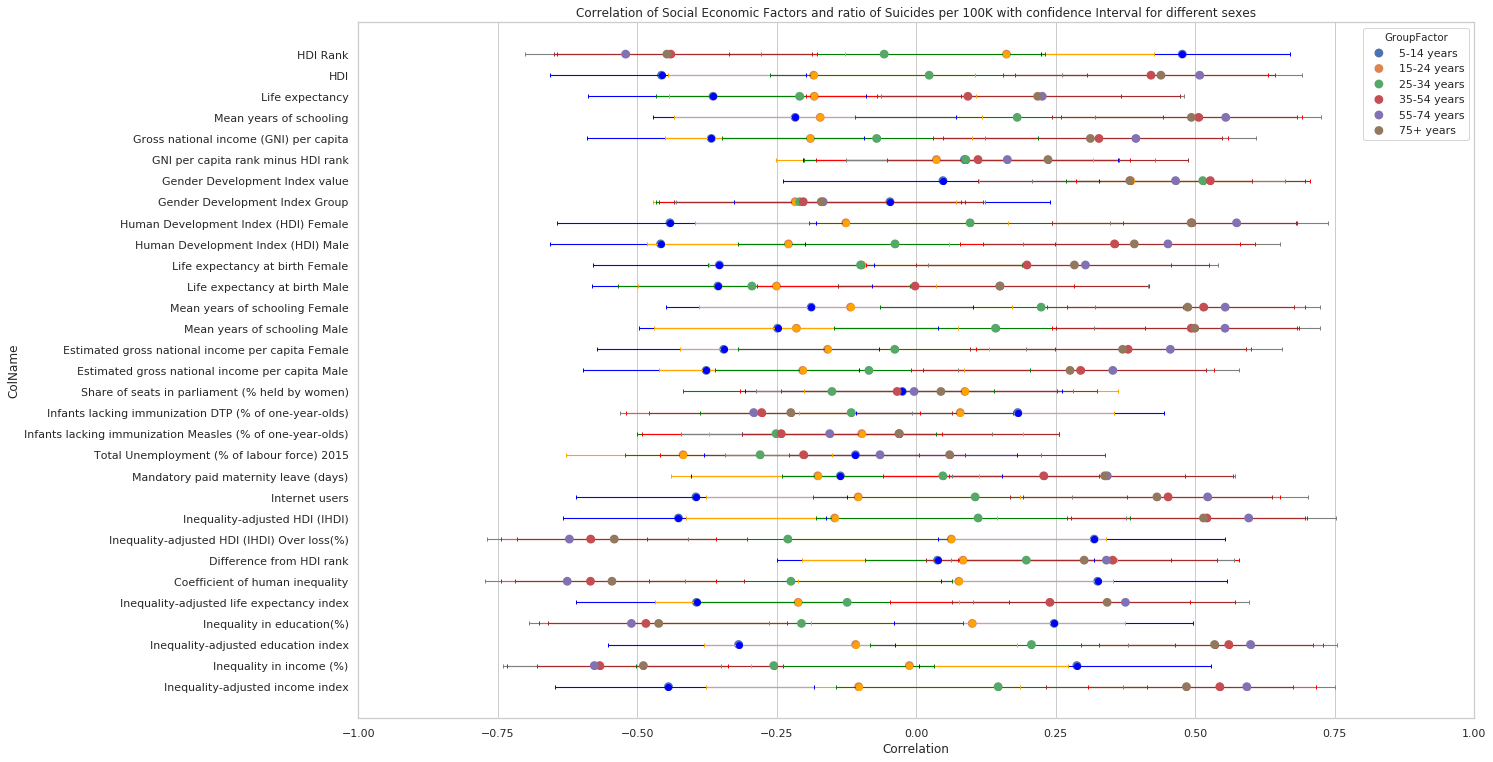

In [54]:
dataEdit2015 = dataEdit.loc[dataEdit["year"]==2015]
dataEdit2015Age=dataEdit2015.groupby(["Country","age"]).agg({"suicides_no":"sum","population":"sum"}).reset_index()
c=dataEdit2015Age.groupby(["Country"]).agg({"suicides_no":"sum","population":"sum"}).reset_index()
dataEdit2015Age = pd.merge(dataEdit2015Age, c, on="Country", how='outer')
dataEdit2015Age=dataEdit2015Age.drop(columns=["population_x","suicides_no_y"])
dataEdit2015Age.rename(columns={"suicides_no_x":"suicides","population_y":"Total Population"},inplace=True)
dataEdit2015Age = dataEdit2015Age.loc[dataEdit2015Age["Total Population"]>0]
dataEdit2015Age["ratio"]=dataEdit2015Age["suicides"]/dataEdit2015Age["Total Population"]*100000
age_order=["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]
correlationToRatioGroup(data=dataEdit2015Age,dataHDI=HDI2015,orders=age_order,group="age")

By having all 6 age groups, it becomes messy and difficult to interpret. However, we can see that for the older age groups, the HDI has a stronger relationship to the ratio of suicides per 100k. We can see that these older age groups are more sensitive in other factors. 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


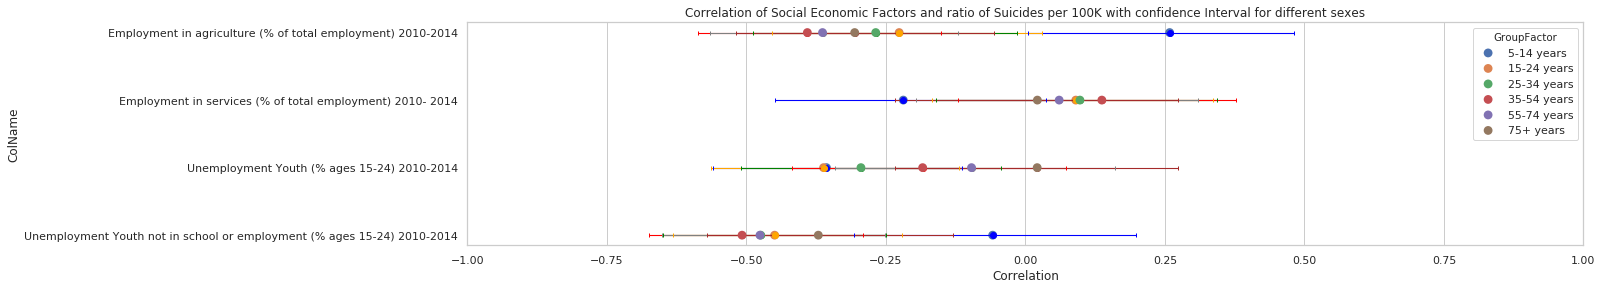

In [55]:
factors = ["Country",'Employment in agriculture (% of total employment) 2010-2014','Employment in services (% of total employment) 2010- 2014','Unemployment Youth (% ages 15-24) 2010-2014','Unemployment Youth not in school or employment (% ages 15-24) 2010-2014',]
age_order=["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]        
HDIAge = dataHDI[factors]
dataEdit2010_2014 = dataEdit.loc[dataEdit["year"].isin(["2010","2011","2012","2013","2014"])]
dataEdit2010_2014Age=dataEdit2010_2014.groupby(["Country","year","age"]).agg({"suicides_no":"sum","population":"sum"}).reset_index()
dataEdit2010_2014Age
dataEdit2010_2014Age["ratio"]=dataEdit2010_2014Age["suicides_no"]/dataEdit2010_2014Age["population"]*100000

dataEdit2010_2014Age=dataEdit2010_2014Age.groupby(["Country","age"]).agg({"ratio":"mean"}).reset_index()
correlationToRatioGroup(data=dataEdit2010_2014Age,dataHDI=HDIAge,orders=age_order,group="age")

Once again the older age groups are more sensitive but the correlation are in between -0.5 to 0.25, implying there isn't a strong relationship with employment and suicide rates. 

**Conclusion**

In conclusion, we see that Males commit more suicides. Even though there are more sucidies for the Boomer generation and age groups of 35-54 years in the data, this is due to more data points and population in these groups. If we look closer at the ratio of sucides by population per 100K, we see that the age groups 75+ commit more suicides and the  GI generation have more suicides.  In terms of GDP, there is a negative relationship with suicide rates such that as GDP falls, there are more suicides. However, interestingly, there is a weak positive relationship between HDI and suicide rates.
In addition, other social economic factors do not really affect the sucide rates. An explaination could be due to the fact that these factors are on a macro level. We will need to look at social economic factors on an individual level such as the budget of meantal helath. There can be more analysis by different social economic factors with in the HDI database but we would probably find litte correlation.
From this analysis, we will need to focus on older Males in the age group 75+ and analyse them at a suburbian level to find any factors that have a high correlation to suicidal rates. Once we find these factors, we can focus on finding a solution to lower suicide rates. 